# Time Series of Phytoplankton Bloom Timing and Environmental Drivers from 2007-2020 at Station S3 (201905 model run)

To run this notebook, pickle files for each year of interest must be created in the 'makePickles201905' notebook.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl
import netCDF4 as nc
import datetime as dt
from salishsea_tools import evaltools as et, places, viz_tools, visualisations, bloomdrivers
import xarray as xr
import pandas as pd
import pickle
import os

%matplotlib inline

### To recreate this notebook at a different location, follow these instructions: 
Change only the values in the following cell. If you change the startyear and endyear, the xticks (years) in the plots will need to be adjusted accordingly. If you did not make pickle files for 201812 bloom timing variables, remove the cell that loads that data *'Load bloom timing variables for 201812 run'*, as well as a section from the cell that plots bloom timing; *'Bloom Date'*. The code to create 201812 pickles files can be found at ``/ocean/aisabell/MEOPAR/Analysis-Aline/notebooks/Bloom_Timing/stationS3/201812EnvironmentalDrivers.ipynb``.

In [2]:
# The path to the directory where the pickle files are stored:
savedir='/ocean/aisabell/MEOPAR/extracted_files'

# Change 'S3' to the location of interest
loc='S3'
# Note: x and y limits in the following cell (map of location) may need to be adjusted

# What is the start year and end year+1 of the time range of interest?
startyear=2007
endyear=2021 # does NOT include this value

# Note: pickle file with 'non-location specific variables' only need to be created for each year, not for each location
# Note: xticks (years) in the plots will need to be changed
# Note: 201812 bloom timing variable load and plotting will also need to be removed

1.1363636363636362

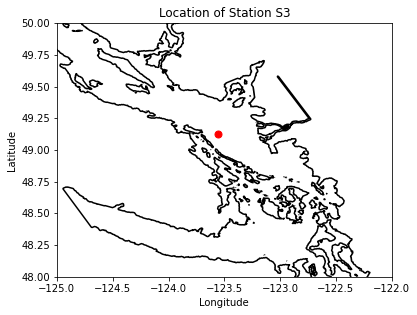

In [3]:
modver='201905'
# lat and lon information for place:
lon,lat=places.PLACES[loc]['lon lat']
# get place information on SalishSeaCast grid:
ij,ii=places.PLACES[loc]['NEMO grid ji']
jw,iw=places.PLACES[loc]['GEM2.5 grid ji']

fig, ax = plt.subplots(1,1,figsize = (6,6))
with xr.open_dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/mesh_mask201702.nc') as mesh:
    ax.contour(mesh.nav_lon,mesh.nav_lat,mesh.tmask.isel(t=0,z=0),[0.1,],colors='k')
    tmask=np.array(mesh.tmask)
    gdept_1d=np.array(mesh.gdept_1d)
    e3t_0=np.array(mesh.e3t_0)
ax.plot(lon, lat, '.', markersize=14, color='red')
ax.set_ylim(48,50)
ax.set_xlim(-125,-122)
ax.set_title('Location of Station %s'%loc)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
viz_tools.set_aspect(ax,coords='map')

### Strait of Georgia Region:

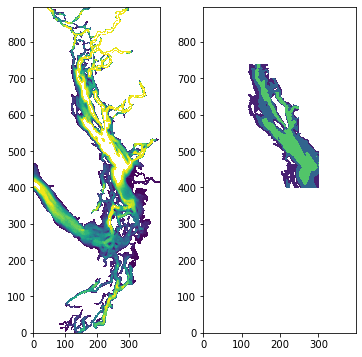

In [4]:
# define sog region:
fig, ax = plt.subplots(1,2,figsize = (6,6))
with xr.open_dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc') as bathy:
    bath=np.array(bathy.Bathymetry)
ax[0].contourf(bath,np.arange(0,250,10))
viz_tools.set_aspect(ax[0],coords='grid')
sogmask=np.copy(tmask[:,:,:,:])
sogmask[:,:,740:,:]=0
sogmask[:,:,700:,170:]=0
sogmask[:,:,550:,250:]=0
sogmask[:,:,:,302:]=0
sogmask[:,:,:400,:]=0
sogmask[:,:,:,:100]=0
#sogmask250[bath<250]=0
ax[1].contourf(np.ma.masked_where(sogmask[0,0,:,:]==0,bathy.Bathymetry),[0,100,250,550])

###  *** Stop and check, have you made pickle files for all the years? ***

### Load bloom timing variables for 201905 run

In [5]:
# loop through years of spring time series (mid feb-june) for bloom timing for 201905 run
years=list()
bloomtime1=list()
bloomtime2=list()
bloomtime3=list()
for year in range(startyear,endyear):
    fname3=f'springBloomTime_{str(year)}_{loc}_{modver}.pkl'
    savepath3=os.path.join(savedir,fname3)
    bio_time0,sno30,sdiat0,sflag0,scili0,diat_alld0,no3_alld0,flag_alld0,cili_alld0,phyto_alld0,\
                 intdiat0,intphyto0,fracdiat0,sphyto0,percdiat0=pickle.load(open(savepath3,'rb'))
    # put code that calculates bloom timing here
    bt1=bloomdrivers.metric1_bloomtime(phyto_alld0,no3_alld0,bio_time0)
    bt2=bloomdrivers.metric2_bloomtime(sphyto0,sno30,bio_time0)
    bt3=bloomdrivers.metric3_bloomtime(sphyto0,sno30,bio_time0)
    years.append(year)
    bloomtime1.append(bt1)
    bloomtime2.append(bt2)
    bloomtime3.append(bt3)   
years=np.array(years)
bloomtime1=np.array(bloomtime1)
bloomtime2=np.array(bloomtime2)
bloomtime3=np.array(bloomtime3)

# get year day
yearday1=et.datetimeToYD(bloomtime1)  # convert to year day tool
yearday2=et.datetimeToYD(bloomtime2)
yearday3=et.datetimeToYD(bloomtime3)

### Load bloom timing variables for 201812 run

In [6]:
# Load bloom timing variables for 201812 run
shortyears=list()
bloomtime1_18=list()
bloomtime2_18=list()
bloomtime3_18=list()
for year in range(2015,2020):
    modver18='201812'
    fname3=f'springBloomTime_{str(year)}_{loc}_{modver18}.pkl'
    savepath3=os.path.join(savedir,fname3)
    bio_time0,sno30,sdiat0,sflag0,scili0,diat_alld0,no3_alld0,flag_alld0,cili_alld0,phyto_alld0,\
                 intdiat0,intphyto0,fracdiat0,sphyto0,percdiat0=pickle.load(open(savepath3,'rb'))
    # put code that calculates bloom timing here
    bt1_18=bloomdrivers.metric1_bloomtime(phyto_alld0,no3_alld0,bio_time0)
    bt2_18=bloomdrivers.metric2_bloomtime(sphyto0,sno30,bio_time0)
    bt3_18=bloomdrivers.metric3_bloomtime(sphyto0,sno30,bio_time0)
    shortyears.append(year)
    bloomtime1_18.append(bt1_18)
    bloomtime2_18.append(bt2_18)
    bloomtime3_18.append(bt3_18) 
shortyears=np.array(shortyears)
bloomtime1_18=np.array(bloomtime1_18)
bloomtime2_18=np.array(bloomtime2_18)
bloomtime3_18=np.array(bloomtime3_18)

# get year day
yearday1_18=et.datetimeToYD(bloomtime1_18)  # convert to year day tool
yearday2_18=et.datetimeToYD(bloomtime2_18)
yearday3_18=et.datetimeToYD(bloomtime3_18)

### Combine separate year files into arrays:

In [7]:
# loop through years (for location specific drivers)

years=list()
windjan=list()
windfeb=list()
windmar=list()
solarjan=list()
solarfeb=list()
solarmar=list()
parjan=list()
parfeb=list()
parmar=list()
tempjan=list()
tempfeb=list()
tempmar=list()
saljan=list()
salfeb=list()
salmar=list()
zoojan=list()
zoofeb=list()
zoomar=list()
mesozoojan=list()
mesozoofeb=list()
mesozoomar=list()
microzoojan=list()
microzoofeb=list()
microzoomar=list()
intzoojan=list()
intzoofeb=list()
intzoomar=list()
intmesozoojan=list()
intmesozoofeb=list()
intmesozoomar=list()
intmicrozoojan=list()
intmicrozoofeb=list()
intmicrozoomar=list()
midno3jan=list()
midno3feb=list()
midno3mar=list()

for year in range(startyear,endyear):
    fname=f'JanToMarch_TimeSeries_{year}_{loc}_{modver}.pkl'
    savepath=os.path.join(savedir,fname)
    bio_time,diat_alld,no3_alld,flag_alld,cili_alld,microzoo_alld,mesozoo_alld,\
            intdiat,intphyto,spar,intmesoz,intmicroz,grid_time,temp,salinity,u_wind,v_wind,twind,\
            solar,no3_30to90m,sno3,sdiat,sflag,scili,intzoop,fracdiat,zoop_alld,sphyto,phyto_alld,\
            percdiat,wspeed,winddirec=pickle.load(open(savepath,'rb'))
    # put code that calculates drivers here
    wind=bloomdrivers.D1_3monthly_avg(twind,wspeed)
    solar=bloomdrivers.D1_3monthly_avg(twind,solar)
    par=bloomdrivers.D1_3monthly_avg(bio_time,spar)
    temp=bloomdrivers.D1_3monthly_avg(grid_time,temp)
    sal=bloomdrivers.D1_3monthly_avg(grid_time,salinity)
    zoo=bloomdrivers.D2_3monthly_avg(bio_time,zoop_alld)
    mesozoo=bloomdrivers.D2_3monthly_avg(bio_time,mesozoo_alld)
    microzoo=bloomdrivers.D2_3monthly_avg(bio_time,microzoo_alld)
    intzoo=bloomdrivers.D1_3monthly_avg(bio_time,intzoop)
    intmesozoo=bloomdrivers.D1_3monthly_avg(bio_time,intmesoz)
    intmicrozoo=bloomdrivers.D1_3monthly_avg(bio_time,intmicroz)
    midno3=bloomdrivers.D1_3monthly_avg(bio_time,no3_30to90m)
    
    years.append(year)
    windjan.append(wind[0])
    windfeb.append(wind[1])
    windmar.append(wind[2])   
    solarjan.append(solar[0])
    solarfeb.append(solar[1])
    solarmar.append(solar[2])
    parjan.append(par[0])
    parfeb.append(par[1])
    parmar.append(par[2])
    tempjan.append(temp[0])
    tempfeb.append(temp[1])
    tempmar.append(temp[2])
    saljan.append(sal[0])
    salfeb.append(sal[1])
    salmar.append(sal[2])
    zoojan.append(zoo[0])
    zoofeb.append(zoo[1])
    zoomar.append(zoo[2])
    mesozoojan.append(mesozoo[0])
    mesozoofeb.append(mesozoo[1])
    mesozoomar.append(mesozoo[2])
    microzoojan.append(microzoo[0])
    microzoofeb.append(microzoo[1])
    microzoomar.append(microzoo[2])
    intzoojan.append(intzoo[0])
    intzoofeb.append(intzoo[1])
    intzoomar.append(intzoo[2])
    intmesozoojan.append(intmesozoo[0])
    intmesozoofeb.append(intmesozoo[1])
    intmesozoomar.append(intmesozoo[2])
    intmicrozoojan.append(intmicrozoo[0])
    intmicrozoofeb.append(intmicrozoo[1])
    intmicrozoomar.append(intmicrozoo[2])
    midno3jan.append(midno3[0])
    midno3feb.append(midno3[1])
    midno3mar.append(midno3[2])

years=np.array(years)
windjan=np.array(windjan)
windfeb=np.array(windfeb)
windmar=np.array(windmar)
solarjan=np.array(solarjan)
solarfeb=np.array(solarfeb)
solarmar=np.array(solarmar)
parjan=np.array(parjan)
parfeb=np.array(parfeb)
parmar=np.array(parmar)
tempjan=np.array(tempjan)
tempfeb=np.array(tempfeb)
tempmar=np.array(tempmar)
saljan=np.array(saljan)
salfeb=np.array(salfeb)
salmar=np.array(salmar)
zoojan=np.array(zoojan)
zoofeb=np.array(zoofeb)
zoomar=np.array(zoomar)
mesozoojan=np.array(mesozoojan)
mesozoofeb=np.array(mesozoofeb)
mesozoomar=np.array(mesozoomar)
microzoojan=np.array(microzoojan)
microzoofeb=np.array(microzoofeb)
microzoomar=np.array(microzoomar)
intzoojan=np.array(intzoojan)
intzoofeb=np.array(intzoofeb)
intzoomar=np.array(intzoomar)
intmesozoojan=np.array(intmesozoojan)
intmesozoofeb=np.array(intmesozoofeb)
intmesozoomar=np.array(intmesozoomar)
intmicrozoojan=np.array(intmicrozoojan)
intmicrozoofeb=np.array(intmicrozoofeb)
intmicrozoomar=np.array(intmicrozoomar)
midno3jan=np.array(midno3jan)
midno3feb=np.array(midno3feb)
midno3mar=np.array(midno3mar)

In [8]:
# loop through years (for non-location specific drivers)
fraserjan=list()
fraserfeb=list()
frasermar=list()
deepno3jan=list()
deepno3feb=list()
deepno3mar=list()

for year in range(startyear,endyear):
    fname2=f'JanToMarch_TimeSeries_{year}_{modver}.pkl'
    savepath2=os.path.join(savedir,fname2)
    no3_past250m,riv_time,rivFlow=pickle.load(open(savepath2,'rb'))
    # Code that calculates drivers here
    fraser=bloomdrivers.D1_3monthly_avg2(riv_time,rivFlow)
    fraserjan.append(fraser[0])
    fraserfeb.append(fraser[1])
    frasermar.append(fraser[2])

    fname=f'JanToMarch_TimeSeries_{year}_{loc}_{modver}.pkl'
    savepath=os.path.join(savedir,fname)
    bio_time,diat_alld,no3_alld,flag_alld,cili_alld,microzoo_alld,mesozoo_alld,\
            intdiat,intphyto,spar,intmesoz,intmicroz,grid_time,temp,salinity,u_wind,v_wind,twind,\
            solar,no3_30to90m,sno3,sdiat,sflag,scili,intzoop,fracdiat,zoop_alld,sphyto,phyto_alld,\
            percdiat,wspeed,winddirec=pickle.load(open(savepath,'rb'))
    deepno3=bloomdrivers.D1_3monthly_avg(bio_time,no3_past250m)
 
    deepno3jan.append(deepno3[0])
    deepno3feb.append(deepno3[1])
    deepno3mar.append(deepno3[2])

fraserjan=np.array(fraserjan)
fraserfeb=np.array(fraserfeb)
frasermar=np.array(frasermar)
deepno3jan=np.array(deepno3jan)
deepno3feb=np.array(deepno3feb)
deepno3mar=np.array(deepno3mar)

In [9]:
# loop through years (for mixing drivers)

halojan=list()
halofeb=list()
halomar=list()

for year in range(startyear,endyear):
    fname4=f'JanToMarch_Mixing_{year}_{loc}_{modver}.pkl'
    savepath4=os.path.join(savedir,fname4)
    halocline,eddy,depth,grid_time,temp,salinity=pickle.load(open(savepath4,'rb'))
    fname=f'JanToMarch_TimeSeries_{year}_{loc}_{modver}.pkl'
    savepath=os.path.join(savedir,fname)
    bio_time,diat_alld,no3_alld,flag_alld,cili_alld,microzoo_alld,mesozoo_alld,\
            intdiat,intphyto,spar,intmesoz,intmicroz,grid_time,temp,salinity,u_wind,v_wind,twind,\
            solar,no3_30to90m,sno3,sdiat,sflag,scili,intzoop,fracdiat,zoop_alld,sphyto,phyto_alld,\
            percdiat,wspeed,winddirec=pickle.load(open(savepath,'rb'))
    # put code that calculates drivers here
    halo=bloomdrivers.D1_3monthly_avg(grid_time,halocline)
    halojan.append(halo[0])
    halofeb.append(halo[1])
    halomar.append(halo[2])

halojan=np.array(halojan)
halofeb=np.array(halofeb)
halomar=np.array(halomar)

### Bloom date

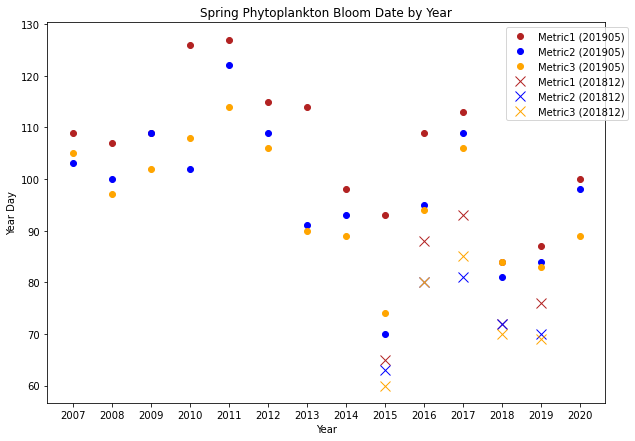

In [10]:
# plot bloomtime for each year: 
fig,ax=plt.subplots(1,1,figsize=(10,7))
p1=ax.plot(years,yearday1, 'o',color='firebrick',label='Metric1 (201905)')
p2=ax.plot(years,yearday2, 'o',color='b',label='Metric2 (201905)')
p3=ax.plot(years,yearday3, 'o',color='orange',label='Metric3 (201905)')
p4=ax.plot(shortyears,yearday1_18, 'x',color='firebrick',label='Metric1 (201812)',markersize=10)
p5=ax.plot(shortyears,yearday2_18, 'x',color='b',label='Metric2 (201812)',markersize=10)
p6=ax.plot(shortyears,yearday3_18, 'x',color='orange',label='Metric3 (201812)',markersize=10)
ax.set_ylabel('Year Day')
ax.set_xlabel('Year')
ax.set_title('Spring Phytoplankton Bloom Date by Year')
ax.set_xticks([2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020])
ax.legend(handles=[p1[0],p2[0],p3[0],p4[0],p5[0],p6[0]],bbox_to_anchor=(1.05, 1.0))

### Monthly average wind speed cubed (January-March)

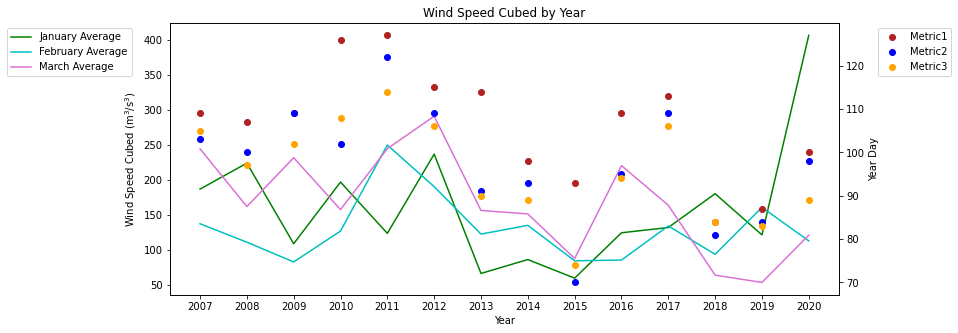

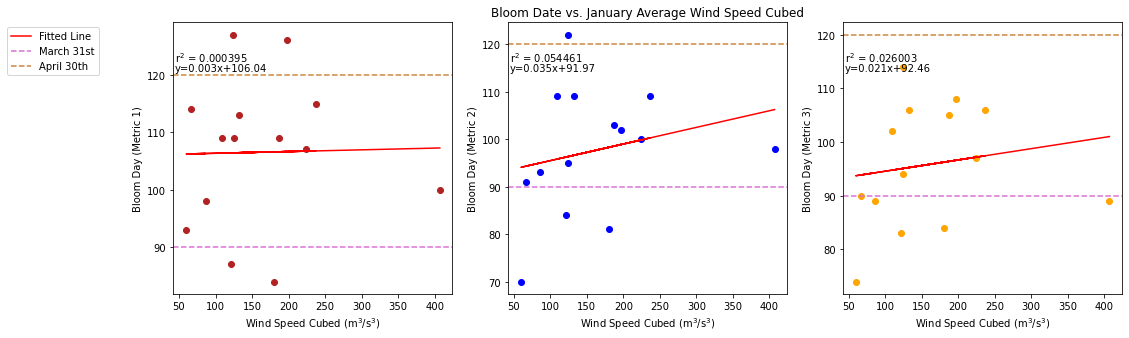

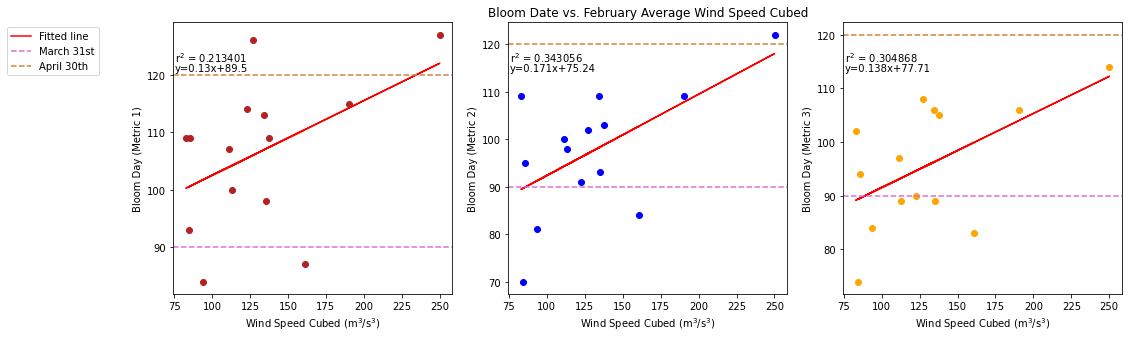

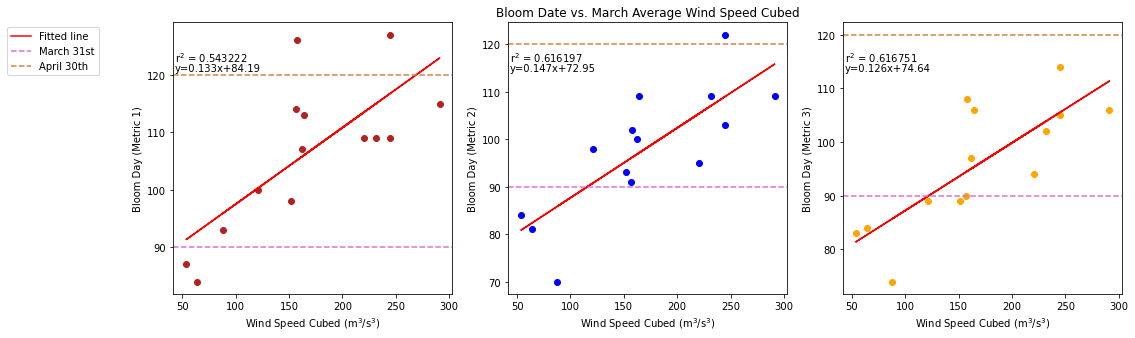

In [11]:
fig,ax=plt.subplots(1,1,figsize=(12,5))
p1=ax.plot(years,windjan, '-',color='green',label='January Average')
p2=ax.plot(years,windfeb, '-',color='c',label='February Average')
p3=ax.plot(years,windmar, '-',color='orchid',label='March Average')
ax.set_ylabel('Wind Speed Cubed ($\mathregular{m^3}$/$\mathregular{s^3}$)')
ax.set_xlabel('Year')
ax.set_title('Wind Speed Cubed by Year')
ax.set_xticks([2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020])
ax.legend(handles=[p1[0],p2[0],p3[0]],bbox_to_anchor=(-0.25, 1.0), loc='upper left')

ax1=ax.twinx()
p4=ax1.plot(years,yearday1, 'o',color='firebrick',label='Metric1')
p5=ax1.plot(years,yearday2, 'o',color='b',label='Metric2')
p6=ax1.plot(years,yearday3, 'o',color='orange',label='Metric3')
ax1.set_ylabel('Year Day')
ax1.legend(handles=[p4[0],p5[0],p6[0]],bbox_to_anchor=(1.05, 1.0), loc='upper left')

# ---------- Jan ---------
fig2,ax2=plt.subplots(1,3,figsize=(17,5))
ax2[0].plot(windjan,yearday1,'o',color='firebrick')
ax2[0].set_xlabel('Wind Speed Cubed ($\mathregular{m^3}$/$\mathregular{s^3}$)')
ax2[0].set_ylabel('Bloom Day (Metric 1)')
y,r2,m,b=bloomdrivers.reg_r2(windjan,yearday1)
ax2[0].plot(windjan, y, 'r', label='Fitted Line')
ax2[0].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2,transform=ax.transAxes)
ax2[0].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax.transAxes)

ax2[1].plot(windjan,yearday2,'o',color='b')
ax2[1].set_xlabel('Wind Speed Cubed ($\mathregular{m^3}$/$\mathregular{s^3}$)')
ax2[1].set_ylabel('Bloom Day (Metric 2)')
y,r2,m,b=bloomdrivers.reg_r2(windjan,yearday2)
ax2[1].plot(windjan, y, 'r', label='Fitted line')
ax2[1].text(0.6, 0.85, '$\mathregular{r^2}$ = %f'%r2,transform=ax.transAxes)
ax2[1].text(0.6,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax.transAxes)

ax2[2].plot(windjan,yearday3,'o',color='orange')
ax2[2].set_xlabel('Wind Speed Cubed ($\mathregular{m^3}$/$\mathregular{s^3}$)')
ax2[2].set_ylabel('Bloom Day (Metric 3)')
y,r2,m,b=bloomdrivers.reg_r2(windjan,yearday3)
ax2[2].plot(windjan, y, 'r', label='Fitted line')
ax2[2].text(1.1, 0.85, '$\mathregular{r^2}$ = %f'%r2,transform=ax.transAxes)
ax2[2].text(1.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax.transAxes)

ax2[1].set_title('Bloom Date vs. January Average Wind Speed Cubed')

# ---------- Feb ---------
fig3,ax3=plt.subplots(1,3,figsize=(17,5))
ax3[0].plot(windfeb,yearday1,'o',color='firebrick')
ax3[0].set_xlabel('Wind Speed Cubed ($\mathregular{m^3}$/$\mathregular{s^3}$)')
ax3[0].set_ylabel('Bloom Day (Metric 1)')
y,r2,m,b=bloomdrivers.reg_r2(windfeb,yearday1)
ax3[0].plot(windfeb, y, 'r', label='Fitted line')
ax3[0].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2,transform=ax.transAxes)
ax3[0].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax.transAxes)

ax3[1].plot(windfeb,yearday2,'o',color='b')
ax3[1].set_xlabel('Wind Speed Cubed ($\mathregular{m^3}$/$\mathregular{s^3}$)')
ax3[1].set_ylabel('Bloom Day (Metric 2)')
y,r2,m,b=bloomdrivers.reg_r2(windfeb,yearday2)
ax3[1].plot(windfeb, y, 'r', label='Fitted line')
ax3[1].text(0.6, 0.85, '$\mathregular{r^2}$ = %f'%r2,transform=ax.transAxes)
ax3[1].text(0.6,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax.transAxes)

ax3[2].plot(windfeb,yearday3,'o',color='orange')
ax3[2].set_xlabel('Wind Speed Cubed ($\mathregular{m^3}$/$\mathregular{s^3}$)')
ax3[2].set_ylabel('Bloom Day (Metric 3)')
y,r2,m,b=bloomdrivers.reg_r2(windfeb,yearday3)
ax3[2].plot(windfeb, y, 'r', label='Fitted line')
ax3[2].text(1.1, 0.85, '$\mathregular{r^2}$ = %f'%r2,transform=ax.transAxes)
ax3[2].text(1.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax.transAxes)

ax3[1].set_title('Bloom Date vs. February Average Wind Speed Cubed')

# ---------- March ---------
fig4,ax4=plt.subplots(1,3,figsize=(17,5))
ax4[0].plot(windmar,yearday1,'o',color='firebrick')
ax4[0].set_xlabel('Wind Speed Cubed ($\mathregular{m^3}$/$\mathregular{s^3}$)')
ax4[0].set_ylabel('Bloom Day (Metric 1)')
y,r2,m,b=bloomdrivers.reg_r2(windmar,yearday1)
ax4[0].plot(windmar, y, 'r', label='Fitted line')
ax4[0].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax.transAxes)
ax4[0].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax.transAxes)

ax4[1].plot(windmar,yearday2,'o',color='b')
ax4[1].set_xlabel('Wind Speed Cubed ($\mathregular{m^3}$/$\mathregular{s^3}$)')
ax4[1].set_ylabel('Bloom Day (Metric 2)')
ax4[1].set_title('Bloom Date vs. March Average Wind Speed Cubed')
y,r2,m,b=bloomdrivers.reg_r2(windmar,yearday2)
ax4[1].plot(windmar, y, 'r', label='Fitted line')
ax4[1].text(0.6, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax.transAxes)
ax4[1].text(0.6,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax.transAxes)

ax4[2].plot(windmar,yearday3,'o',color='orange')
ax4[2].set_xlabel('Wind Speed Cubed ($\mathregular{m^3}$/$\mathregular{s^3}$)')
ax4[2].set_ylabel('Bloom Day (Metric 3)')
y,r2,m,b=bloomdrivers.reg_r2(windmar,yearday3)
ax4[2].plot(windmar, y, 'r', label='Fitted line')
ax4[2].text(1.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax.transAxes)
ax4[2].text(1.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax.transAxes)

# Jan month lines
ax2[0].axhline(y=90, color='orchid', linestyle='--',label='March 31st')
ax2[0].axhline(y=120, color='peru', linestyle='--',label='April 30th')
ax2[0].legend(bbox_to_anchor=(-0.25, 1.0))
ax2[1].axhline(y=90, color='orchid', linestyle='--')
ax2[2].axhline(y=90, color='orchid', linestyle='--',label='March 31st')
ax2[1].axhline(y=120, color='peru', linestyle='--')
ax2[2].axhline(y=120, color='peru', linestyle='--',label='April 30th')
# Feb month lines
ax3[0].axhline(y=90, color='orchid', linestyle='--',label='March 31st')
ax3[0].axhline(y=120, color='peru', linestyle='--',label='April 30th')
ax3[0].legend(bbox_to_anchor=(-0.25, 1.0))
ax3[1].axhline(y=90, color='orchid', linestyle='--')
ax3[2].axhline(y=90, color='orchid', linestyle='--',label='March 31st')
ax3[1].axhline(y=120, color='peru', linestyle='--')
ax3[2].axhline(y=120, color='peru', linestyle='--',label='April 30th')
# March month lines
ax4[0].axhline(y=90, color='orchid', linestyle='--',label='March 31st')
ax4[0].axhline(y=120, color='peru', linestyle='--',label='April 30th')
ax4[0].legend(bbox_to_anchor=(-0.25, 1.0))
ax4[1].axhline(y=90, color='orchid', linestyle='--')
ax4[2].axhline(y=90, color='orchid', linestyle='--',label='March 31st')
ax4[1].axhline(y=120, color='peru', linestyle='--')
ax4[2].axhline(y=120, color='peru', linestyle='--',label='April 30th')

### Monthly average solar radiation (January-March)

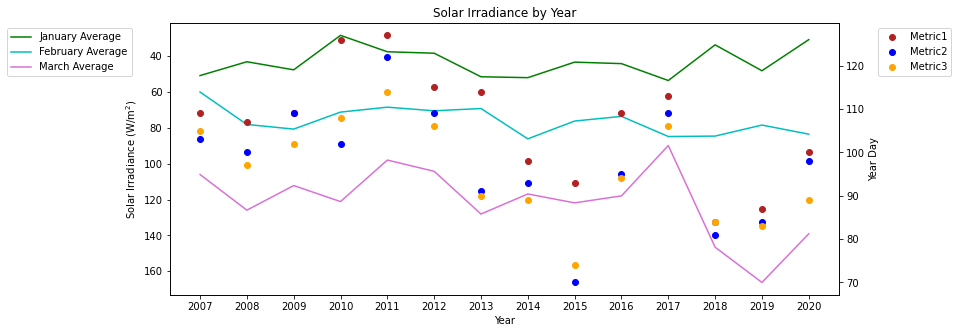

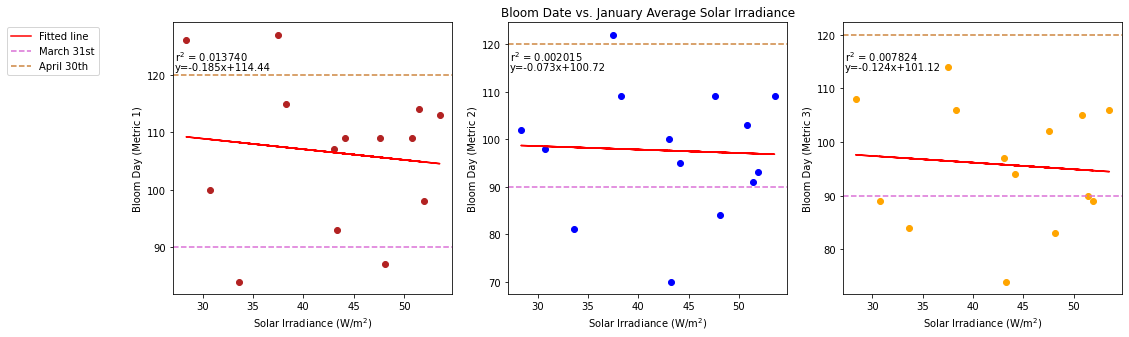

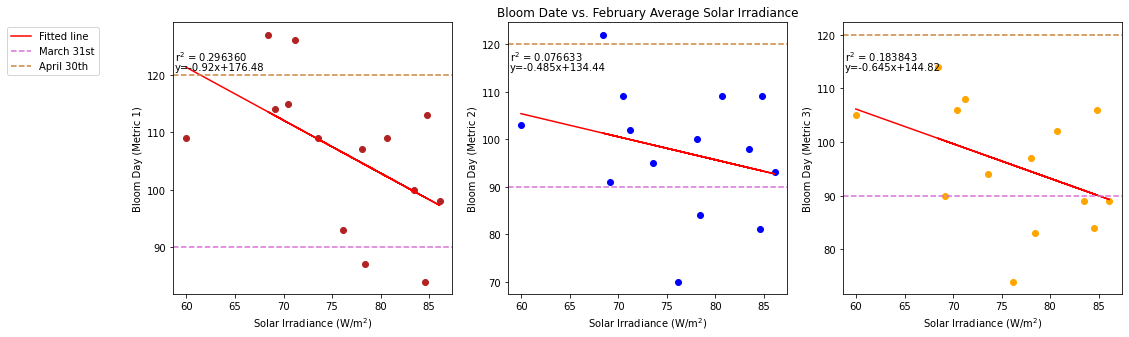

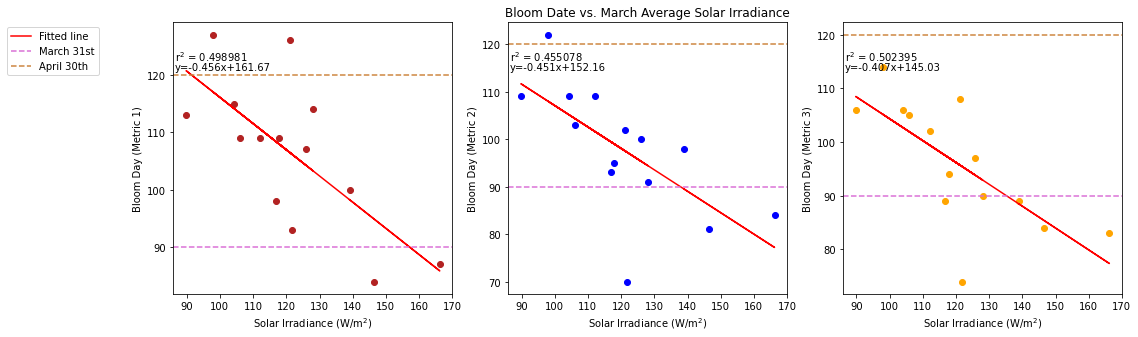

In [25]:
fig,ax=plt.subplots(1,1,figsize=(12,5))
p1=ax.plot(years,solarjan, '-',color='green',label='January Average')
p2=ax.plot(years,solarfeb, '-',color='c',label='February Average')
p3=ax.plot(years,solarmar, '-',color='orchid',label='March Average')
ax.set_ylabel('Solar Irradiance (W/$\mathregular{m^2}$)')
ax.set_xlabel('Year')
ax.set_title('Solar Irradiance by Year')
ax.set_xticks([2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020])
ax.legend(handles=[p1[0],p2[0],p3[0]],bbox_to_anchor=(-0.25, 1.0), loc='upper left')
ax.invert_yaxis()

ax1=ax.twinx()
p4=ax1.plot(years,yearday1, 'o',color='firebrick',label='Metric1')
p5=ax1.plot(years,yearday2, 'o',color='b',label='Metric2')
p6=ax1.plot(years,yearday3, 'o',color='orange',label='Metric3')
ax1.set_ylabel('Year Day')
ax1.legend(handles=[p4[0],p5[0],p6[0]],bbox_to_anchor=(1.05, 1.0), loc='upper left')

# ----Jan----
fig2,ax2=plt.subplots(1,3,figsize=(17,5))
ax2[0].plot(solarjan,yearday1,'o',color='firebrick')
ax2[0].set_xlabel('Solar Irradiance (W/$\mathregular{m^2}$)')
ax2[0].set_ylabel('Bloom Day (Metric 1)')
y,r2,m,b=bloomdrivers.reg_r2(solarjan,yearday1)
ax2[0].plot(solarjan, y, 'r', label='Fitted line')
ax2[0].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax.transAxes)
ax2[0].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax.transAxes)

ax2[1].plot(solarjan,yearday2,'o',color='b')
ax2[1].set_xlabel('Solar Irradiance (W/$\mathregular{m^2}$)')
ax2[1].set_ylabel('Bloom Day (Metric 2)')
y,r2,m,b=bloomdrivers.reg_r2(solarjan,yearday2)
ax2[1].plot(solarjan, y, 'r', label='Fitted line')
ax2[1].text(0.6, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax.transAxes)
ax2[1].text(0.6,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax.transAxes)

ax2[2].plot(solarjan,yearday3,'o',color='orange')
ax2[2].set_xlabel('Solar Irradiance (W/$\mathregular{m^2}$)')
ax2[2].set_ylabel('Bloom Day (Metric 3)')
ax2[1].set_title('Bloom Date vs. January Average Solar Irradiance')
y,r2,m,b=bloomdrivers.reg_r2(solarjan,yearday3)
ax2[2].plot(solarjan, y, 'r', label='Fitted line')
ax2[2].text(1.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax.transAxes)
ax2[2].text(1.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax.transAxes)

# ----Feb----
fig3,ax3=plt.subplots(1,3,figsize=(17,5))
ax3[0].plot(solarfeb,yearday1,'o',color='firebrick')
ax3[0].set_xlabel('Solar Irradiance (W/$\mathregular{m^2}$)')
ax3[0].set_ylabel('Bloom Day (Metric 1)')
y,r2,m,b=bloomdrivers.reg_r2(solarfeb,yearday1)
ax3[0].plot(solarfeb, y, 'r', label='Fitted line')
ax3[0].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax.transAxes)
ax3[0].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax.transAxes)

ax3[1].plot(solarfeb,yearday2,'o',color='b')
ax3[1].set_xlabel('Solar Irradiance (W/$\mathregular{m^2}$)')
ax3[1].set_ylabel('Bloom Day (Metric 2)')
y,r2,m,b=bloomdrivers.reg_r2(solarfeb,yearday2)
ax3[1].plot(solarfeb, y, 'r', label='Fitted line')
ax3[1].text(0.6, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax.transAxes)
ax3[1].text(0.6,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax.transAxes)

ax3[2].plot(solarfeb,yearday3,'o',color='orange')
ax3[2].set_xlabel('Solar Irradiance (W/$\mathregular{m^2}$)')
ax3[2].set_ylabel('Bloom Day (Metric 3)')
y,r2,m,b=bloomdrivers.reg_r2(solarfeb,yearday3)
ax3[2].plot(solarfeb, y, 'r', label='Fitted line')
ax3[2].text(1.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax.transAxes)
ax3[2].text(1.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax.transAxes)
ax3[1].set_title('Bloom Date vs. February Average Solar Irradiance')

# ----March----
fig4,ax4=plt.subplots(1,3,figsize=(17,5))
ax4[0].plot(solarmar,yearday1,'o',color='firebrick')
ax4[0].set_xlabel('Solar Irradiance (W/$\mathregular{m^2}$)')
ax4[0].set_ylabel('Bloom Day (Metric 1)')
y,r2,m,b=bloomdrivers.reg_r2(solarmar,yearday1)
ax4[0].plot(solarmar, y, 'r', label='Fitted line')
ax4[0].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax.transAxes)
ax4[0].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax.transAxes)

ax4[1].plot(solarmar,yearday2,'o',color='b')
ax4[1].set_xlabel('Solar Irradiance (W/$\mathregular{m^2}$)')
ax4[1].set_ylabel('Bloom Day (Metric 2)')
y,r2,m,b=bloomdrivers.reg_r2(solarmar,yearday2)
ax4[1].plot(solarmar, y, 'r', label='Fitted line')
ax4[1].text(0.6, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax.transAxes)
ax4[1].text(0.6,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax.transAxes)

ax4[2].plot(solarmar,yearday3,'o',color='orange')
ax4[2].set_xlabel('Solar Irradiance (W/$\mathregular{m^2}$)')
ax4[2].set_ylabel('Bloom Day (Metric 3)')
y,r2,m,b=bloomdrivers.reg_r2(solarmar,yearday3)
ax4[2].plot(solarmar, y, 'r', label='Fitted line')
ax4[2].text(1.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax.transAxes)
ax4[2].text(1.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax.transAxes)
ax4[1].set_title('Bloom Date vs. March Average Solar Irradiance')


# Jan month lines
ax2[0].axhline(y=90, color='orchid', linestyle='--',label='March 31st')
ax2[0].axhline(y=120, color='peru', linestyle='--',label='April 30th')
#ax2[0].axhline(y=151, color='lime', linestyle='--',label='May 31st')
ax2[0].legend(bbox_to_anchor=(-0.25, 1.0))
ax2[1].axhline(y=90, color='orchid', linestyle='--')
ax2[2].axhline(y=90, color='orchid', linestyle='--',label='March 31st')
ax2[1].axhline(y=120, color='peru', linestyle='--')
ax2[2].axhline(y=120, color='peru', linestyle='--',label='April 30th')
# Feb month lines
ax3[0].axhline(y=90, color='orchid', linestyle='--',label='March 31st')
ax3[0].axhline(y=120, color='peru', linestyle='--',label='April 30th')
#ax3[0].axhline(y=151, color='lime', linestyle='--',label='May 31st')
ax3[0].legend(bbox_to_anchor=(-0.25, 1.0))
ax3[1].axhline(y=90, color='orchid', linestyle='--')
ax3[2].axhline(y=90, color='orchid', linestyle='--',label='March 31st')
ax3[1].axhline(y=120, color='peru', linestyle='--')
ax3[2].axhline(y=120, color='peru', linestyle='--',label='April 30th')
# March month lines
ax4[0].axhline(y=90, color='orchid', linestyle='--',label='March 31st')
ax4[0].axhline(y=120, color='peru', linestyle='--',label='April 30th')
#ax4[0].axhline(y=151, color='lime', linestyle='--',label='May 31st')
ax4[0].legend(bbox_to_anchor=(-0.25, 1.0))
ax4[1].axhline(y=90, color='orchid', linestyle='--')
ax4[2].axhline(y=90, color='orchid', linestyle='--',label='March 31st')
ax4[1].axhline(y=120, color='peru', linestyle='--')
ax4[2].axhline(y=120, color='peru', linestyle='--',label='April 30th')

### Monthly average surface temperature (January-March)

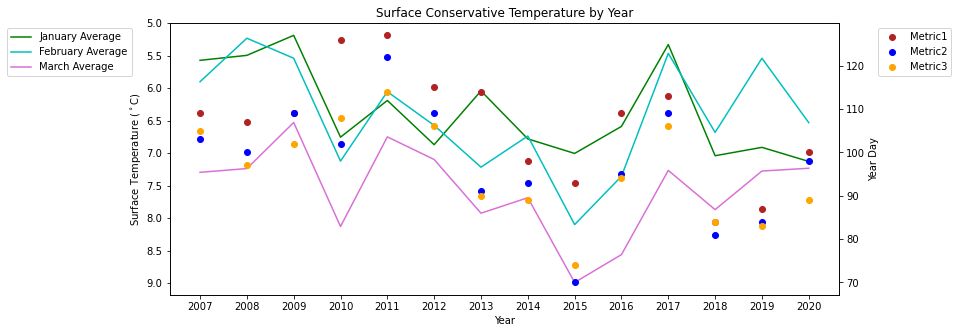

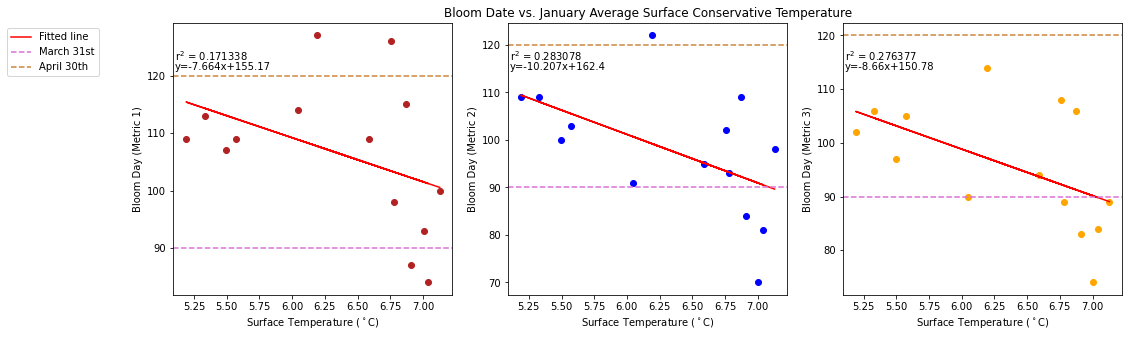

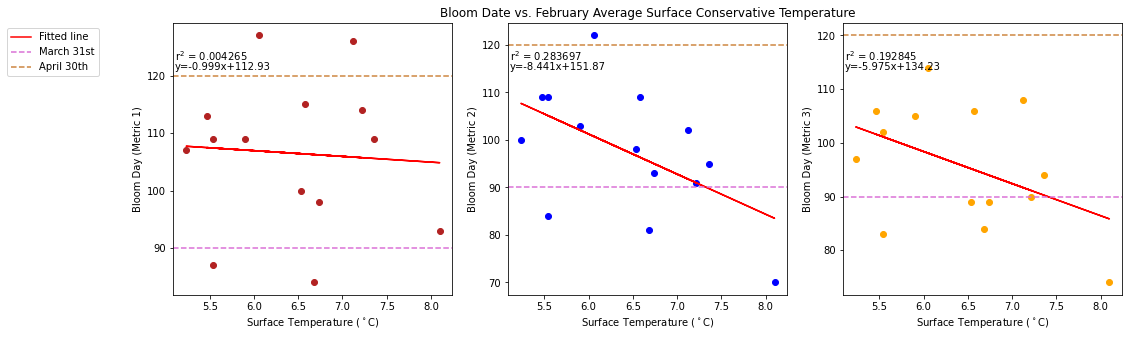

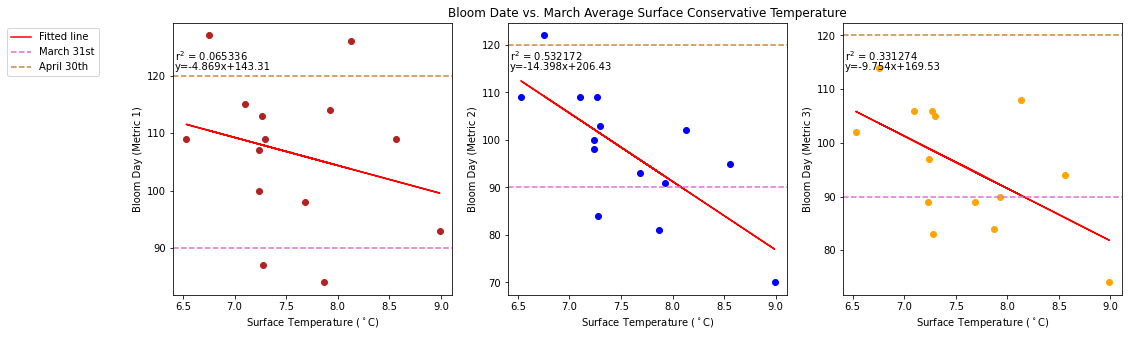

In [27]:
fig,ax=plt.subplots(1,1,figsize=(12,5))
p1=ax.plot(years,tempjan, '-',color='green',label='January Average')
p2=ax.plot(years,tempfeb, '-',color='c',label='February Average')
p3=ax.plot(years,tempmar, '-',color='orchid',label='March Average')
ax.set_ylabel('Surface Temperature ($^\circ$C)')
ax.set_xlabel('Year')
ax.set_title('Surface Conservative Temperature by Year')
ax.set_xticks([2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020])
ax.legend(handles=[p1[0],p2[0],p3[0]],bbox_to_anchor=(-0.25, 1.0), loc='upper left')
ax.invert_yaxis()

ax1=ax.twinx()
p4=ax1.plot(years,yearday1, 'o',color='firebrick',label='Metric1')
p5=ax1.plot(years,yearday2, 'o',color='b',label='Metric2')
p6=ax1.plot(years,yearday3, 'o',color='orange',label='Metric3')
ax1.set_ylabel('Year Day')
ax1.legend(handles=[p4[0],p5[0],p6[0]],bbox_to_anchor=(1.05, 1.0), loc='upper left')

# JAN
fig2,ax2=plt.subplots(1,3,figsize=(17,5))
ax2[0].plot(tempjan,yearday1,'o',color='firebrick')
ax2[0].set_xlabel('Surface Temperature ($^\circ$C)')
ax2[0].set_ylabel('Bloom Day (Metric 1)')
y,r2,m,b=bloomdrivers.reg_r2(tempjan,yearday1)
ax2[0].plot(tempjan, y, 'r', label='Fitted line')
ax2[0].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax.transAxes)
ax2[0].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax.transAxes)

ax2[1].plot(tempjan,yearday2,'o',color='b')
ax2[1].set_xlabel('Surface Temperature ($^\circ$C)')
ax2[1].set_ylabel('Bloom Day (Metric 2)')
y,r2,m,b=bloomdrivers.reg_r2(tempjan,yearday2)
ax2[1].plot(tempjan, y, 'r', label='Fitted line')
ax2[1].text(0.6, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax.transAxes)
ax2[1].text(0.6,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax.transAxes)

ax2[2].plot(tempjan,yearday3,'o',color='orange')
ax2[2].set_xlabel('Surface Temperature ($^\circ$C)')
ax2[2].set_ylabel('Bloom Day (Metric 3)')
y,r2,m,b=bloomdrivers.reg_r2(tempjan,yearday3)
ax2[2].plot(tempjan, y, 'r', label='Fitted line')
ax2[2].text(1.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax.transAxes)
ax2[2].text(1.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax.transAxes)


ax2[1].set_title('Bloom Date vs. January Average Surface Conservative Temperature')

# FEB
fig3,ax3=plt.subplots(1,3,figsize=(17,5))
ax3[0].plot(tempfeb,yearday1,'o',color='firebrick')
ax3[0].set_xlabel('Surface Temperature ($^\circ$C)')
ax3[0].set_ylabel('Bloom Day (Metric 1)')
y,r2,m,b=bloomdrivers.reg_r2(tempfeb,yearday1)
ax3[0].plot(tempfeb, y, 'r', label='Fitted line')
ax3[0].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax.transAxes)
ax3[0].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax.transAxes)

ax3[1].plot(tempfeb,yearday2,'o',color='b')
ax3[1].set_xlabel('Surface Temperature ($^\circ$C)')
ax3[1].set_ylabel('Bloom Day (Metric 2)')
y,r2,m,b=bloomdrivers.reg_r2(tempfeb,yearday2)
ax3[1].plot(tempfeb, y, 'r', label='Fitted line')
ax3[1].text(0.6, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax.transAxes)
ax3[1].text(0.6,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax.transAxes)

ax3[2].plot(tempfeb,yearday3,'o',color='orange')
ax3[2].set_xlabel('Surface Temperature ($^\circ$C)')
ax3[2].set_ylabel('Bloom Day (Metric 3)')
y,r2,m,b=bloomdrivers.reg_r2(tempfeb,yearday3)
ax3[2].plot(tempfeb, y, 'r', label='Fitted line')
ax3[2].text(1.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax.transAxes)
ax3[2].text(1.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax.transAxes)


ax3[1].set_title('Bloom Date vs. February Average Surface Conservative Temperature')

# MARCH
fig4,ax4=plt.subplots(1,3,figsize=(17,5))
ax4[0].plot(tempmar,yearday1,'o',color='firebrick')
ax4[0].set_xlabel('Surface Temperature ($^\circ$C)')
ax4[0].set_ylabel('Bloom Day (Metric 1)')
y,r2,m,b=bloomdrivers.reg_r2(tempmar,yearday1)
ax4[0].plot(tempmar, y, 'r', label='Fitted line')
ax4[0].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax.transAxes)
ax4[0].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax.transAxes)

ax4[1].plot(tempmar,yearday2,'o',color='b')
ax4[1].set_xlabel('Surface Temperature ($^\circ$C)')
ax4[1].set_ylabel('Bloom Day (Metric 2)')
y,r2,m,b=bloomdrivers.reg_r2(tempmar,yearday2)
ax4[1].plot(tempmar, y, 'r', label='Fitted line')
ax4[1].text(0.6, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax.transAxes)
ax4[1].text(0.6,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax.transAxes)

ax4[2].plot(tempmar,yearday3,'o',color='orange')
ax4[2].set_xlabel('Surface Temperature ($^\circ$C)')
ax4[2].set_ylabel('Bloom Day (Metric 3)')
ax4[1].set_title('Bloom Date vs. March Average Surface Conservative Temperature')
y,r2,m,b=bloomdrivers.reg_r2(tempmar,yearday3)
ax4[2].plot(tempmar, y, 'r', label='Fitted line')
ax4[2].text(1.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax.transAxes)
ax4[2].text(1.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax.transAxes)

# Jan month lines
ax2[0].axhline(y=90, color='orchid', linestyle='--',label='March 31st')
ax2[0].axhline(y=120, color='peru', linestyle='--',label='April 30th')
#ax2[0].axhline(y=151, color='lime', linestyle='--',label='May 31st')
ax2[0].legend(bbox_to_anchor=(-0.25, 1.0))
ax2[1].axhline(y=90, color='orchid', linestyle='--')
ax2[2].axhline(y=90, color='orchid', linestyle='--',label='March 31st')
ax2[1].axhline(y=120, color='peru', linestyle='--')
ax2[2].axhline(y=120, color='peru', linestyle='--',label='April 30th')
# Feb month lines
ax3[0].axhline(y=90, color='orchid', linestyle='--',label='March 31st')
ax3[0].axhline(y=120, color='peru', linestyle='--',label='April 30th')
#ax3[0].axhline(y=151, color='lime', linestyle='--',label='May 31st')
ax3[0].legend(bbox_to_anchor=(-0.25, 1.0))
ax3[1].axhline(y=90, color='orchid', linestyle='--')
ax3[2].axhline(y=90, color='orchid', linestyle='--',label='March 31st')
ax3[1].axhline(y=120, color='peru', linestyle='--')
ax3[2].axhline(y=120, color='peru', linestyle='--',label='April 30th')
# March month lines
ax4[0].axhline(y=90, color='orchid', linestyle='--',label='March 31st')
ax4[0].axhline(y=120, color='peru', linestyle='--',label='April 30th')
#ax4[0].axhline(y=151, color='lime', linestyle='--',label='May 31st')
ax4[0].legend(bbox_to_anchor=(-0.25, 1.0))
ax4[1].axhline(y=90, color='orchid', linestyle='--')
ax4[2].axhline(y=90, color='orchid', linestyle='--',label='March 31st')
ax4[1].axhline(y=120, color='peru', linestyle='--')
ax4[2].axhline(y=120, color='peru', linestyle='--',label='April 30th')

### Monthly average surface salinity (January-March)

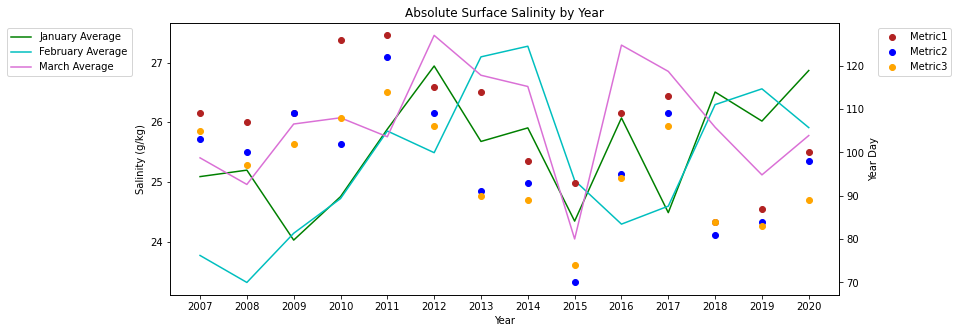

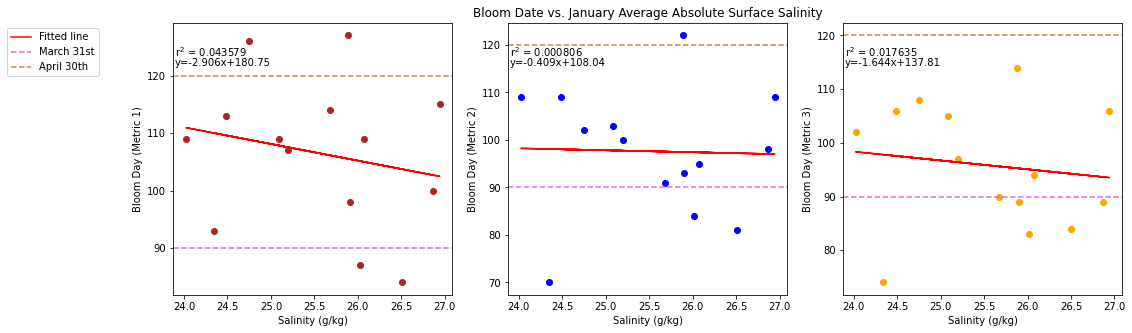

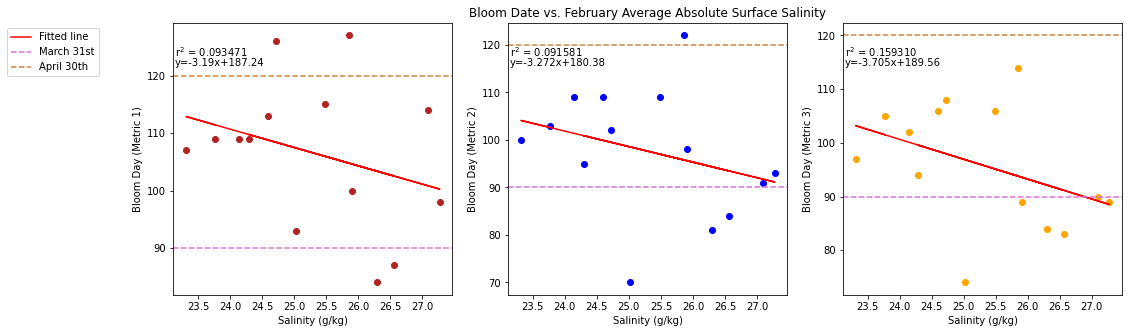

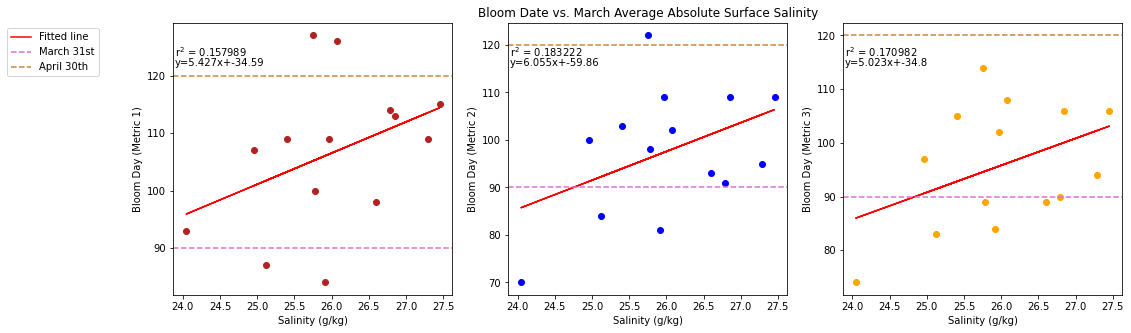

In [28]:
fig,ax=plt.subplots(1,1,figsize=(12,5))
p1=ax.plot(years,saljan, '-',color='green',label='January Average')
p2=ax.plot(years,salfeb, '-',color='c',label='February Average')
p3=ax.plot(years,salmar, '-',color='orchid',label='March Average')
ax.set_ylabel('Salinity (g/kg)')
ax.set_xlabel('Year')
ax.set_title('Absolute Surface Salinity by Year')
ax.set_xticks([2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020])
ax.legend(handles=[p1[0],p2[0],p3[0]],bbox_to_anchor=(-0.25, 1.0), loc='upper left')

ax1=ax.twinx()
p4=ax1.plot(years,yearday1, 'o',color='firebrick',label='Metric1')
p5=ax1.plot(years,yearday2, 'o',color='b',label='Metric2')
p6=ax1.plot(years,yearday3, 'o',color='orange',label='Metric3')
ax1.set_ylabel('Year Day')
ax1.legend(handles=[p4[0],p5[0],p6[0]],bbox_to_anchor=(1.05, 1.0), loc='upper left')

# JAN
fig2,ax2=plt.subplots(1,3,figsize=(17,5))
ax2[0].plot(saljan,yearday1,'o',color='firebrick')
ax2[0].set_xlabel('Salinity (g/kg)')
ax2[0].set_ylabel('Bloom Day (Metric 1)')
y,r2,m,b=bloomdrivers.reg_r2(saljan,yearday1)
ax2[0].plot(saljan, y, 'r', label='Fitted line')
ax2[0].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax.transAxes)
ax2[0].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax.transAxes)

ax2[1].plot(saljan,yearday2,'o',color='b')
ax2[1].set_xlabel('Salinity (g/kg)')
ax2[1].set_ylabel('Bloom Day (Metric 2)')
y,r2,m,b=bloomdrivers.reg_r2(saljan,yearday2)
ax2[1].plot(saljan, y, 'r', label='Fitted line')
ax2[1].text(0.6, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax.transAxes)
ax2[1].text(0.6,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax.transAxes)

ax2[2].plot(saljan,yearday3,'o',color='orange')
ax2[2].set_xlabel('Salinity (g/kg)')
ax2[2].set_ylabel('Bloom Day (Metric 3)')
ax2[1].set_title('Bloom Date vs. January Average Absolute Surface Salinity')
y,r2,m,b=bloomdrivers.reg_r2(saljan,yearday3)
ax2[2].plot(saljan, y, 'r', label='Fitted line')
ax2[2].text(1.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax.transAxes)
ax2[2].text(1.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax.transAxes)

# FEB
fig3,ax3=plt.subplots(1,3,figsize=(17,5))
ax3[0].plot(salfeb,yearday1,'o',color='firebrick')
ax3[0].set_xlabel('Salinity (g/kg)')
ax3[0].set_ylabel('Bloom Day (Metric 1)')
y,r2,m,b=bloomdrivers.reg_r2(salfeb,yearday1)
ax3[0].plot(salfeb, y, 'r', label='Fitted line')
ax3[0].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax.transAxes)
ax3[0].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax.transAxes)

ax3[1].plot(salfeb,yearday2,'o',color='b')
ax3[1].set_xlabel('Salinity (g/kg)')
ax3[1].set_ylabel('Bloom Day (Metric 2)')
y,r2,m,b=bloomdrivers.reg_r2(salfeb,yearday2)
ax3[1].plot(salfeb, y, 'r', label='Fitted line')
ax3[1].text(0.6, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax.transAxes)
ax3[1].text(0.6,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax.transAxes)

ax3[2].plot(salfeb,yearday3,'o',color='orange')
ax3[2].set_xlabel('Salinity (g/kg)')
ax3[2].set_ylabel('Bloom Day (Metric 3)')
ax3[1].set_title('Bloom Date vs. February Average Absolute Surface Salinity')
y,r2,m,b=bloomdrivers.reg_r2(salfeb,yearday3)
ax3[2].plot(salfeb, y, 'r', label='Fitted line')
ax3[2].text(1.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax.transAxes)
ax3[2].text(1.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax.transAxes)

# MAR
fig4,ax4=plt.subplots(1,3,figsize=(17,5))
ax4[0].plot(salmar,yearday1,'o',color='firebrick')
ax4[0].set_xlabel('Salinity (g/kg)')
ax4[0].set_ylabel('Bloom Day (Metric 1)')
y,r2,m,b=bloomdrivers.reg_r2(salmar,yearday1)
ax4[0].plot(salmar, y, 'r', label='Fitted line')
ax4[0].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax.transAxes)
ax4[0].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax.transAxes)


ax4[1].plot(salmar,yearday2,'o',color='b')
ax4[1].set_xlabel('Salinity (g/kg)')
ax4[1].set_ylabel('Bloom Day (Metric 2)')
y,r2,m,b=bloomdrivers.reg_r2(salmar,yearday2)
ax4[1].plot(salmar, y, 'r', label='Fitted line')
ax4[1].text(0.6, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax.transAxes)
ax4[1].text(0.6,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax.transAxes)

ax4[2].plot(salmar,yearday3,'o',color='orange')
ax4[2].set_xlabel('Salinity (g/kg)')
ax4[2].set_ylabel('Bloom Day (Metric 3)')
ax4[1].set_title('Bloom Date vs. March Average Absolute Surface Salinity')
y,r2,m,b=bloomdrivers.reg_r2(salmar,yearday3)
ax4[2].plot(salmar, y, 'r', label='Fitted line')
ax4[2].text(1.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax.transAxes)
ax4[2].text(1.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax.transAxes)

# Jan month lines
ax2[0].axhline(y=90, color='orchid', linestyle='--',label='March 31st')
ax2[0].axhline(y=120, color='peru', linestyle='--',label='April 30th')
#ax2[0].axhline(y=151, color='lime', linestyle='--',label='May 31st')
ax2[0].legend(bbox_to_anchor=(-0.25, 1.0))
ax2[1].axhline(y=90, color='orchid', linestyle='--')
ax2[2].axhline(y=90, color='orchid', linestyle='--',label='March 31st')
ax2[1].axhline(y=120, color='peru', linestyle='--')
ax2[2].axhline(y=120, color='peru', linestyle='--',label='April 30th')
# Feb month lines
ax3[0].axhline(y=90, color='orchid', linestyle='--',label='March 31st')
ax3[0].axhline(y=120, color='peru', linestyle='--',label='April 30th')
#ax3[0].axhline(y=151, color='lime', linestyle='--',label='May 31st')
ax3[0].legend(bbox_to_anchor=(-0.25, 1.0))
ax3[1].axhline(y=90, color='orchid', linestyle='--')
ax3[2].axhline(y=90, color='orchid', linestyle='--',label='March 31st')
ax3[1].axhline(y=120, color='peru', linestyle='--')
ax3[2].axhline(y=120, color='peru', linestyle='--',label='April 30th')
# March month lines
ax4[0].axhline(y=90, color='orchid', linestyle='--',label='March 31st')
ax4[0].axhline(y=120, color='peru', linestyle='--',label='April 30th')
#ax4[0].axhline(y=151, color='lime', linestyle='--',label='May 31st')
ax4[0].legend(bbox_to_anchor=(-0.25, 1.0))
ax4[1].axhline(y=90, color='orchid', linestyle='--')
ax4[2].axhline(y=90, color='orchid', linestyle='--',label='March 31st')
ax4[1].axhline(y=120, color='peru', linestyle='--')
ax4[2].axhline(y=120, color='peru', linestyle='--',label='April 30th')

### Monthly average Fraser river flow (January-March)

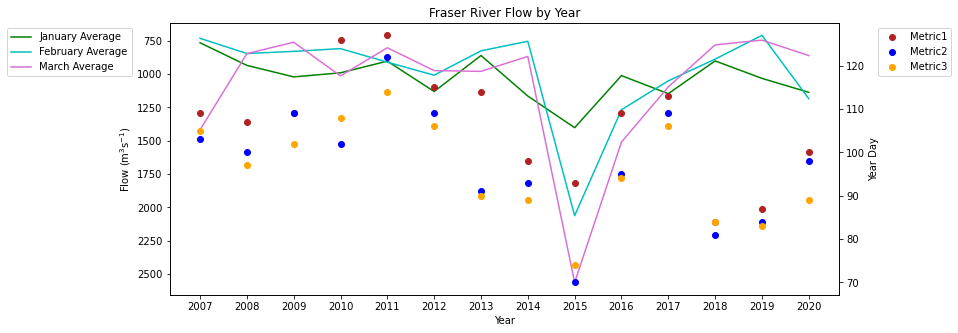

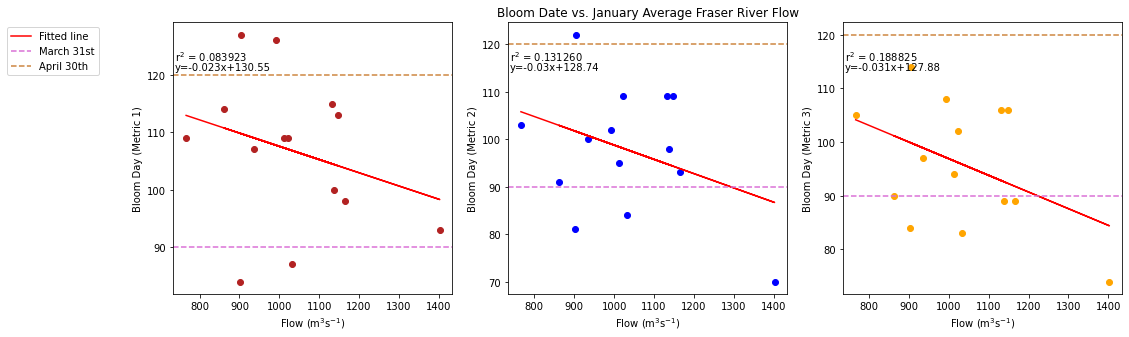

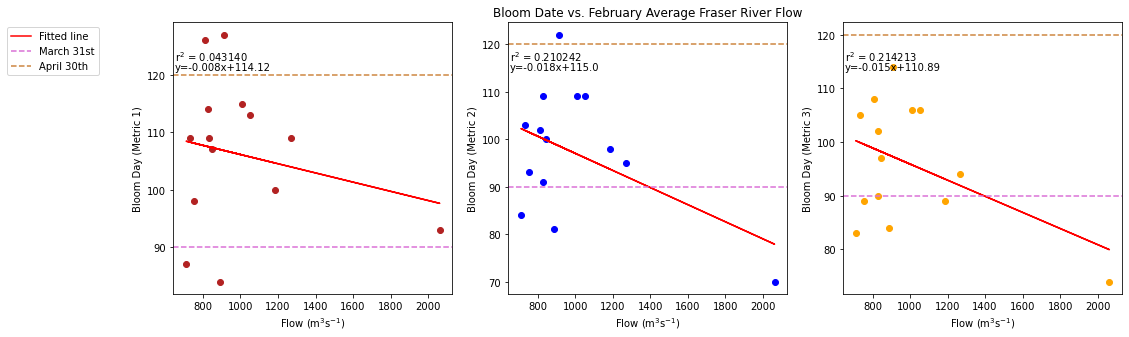

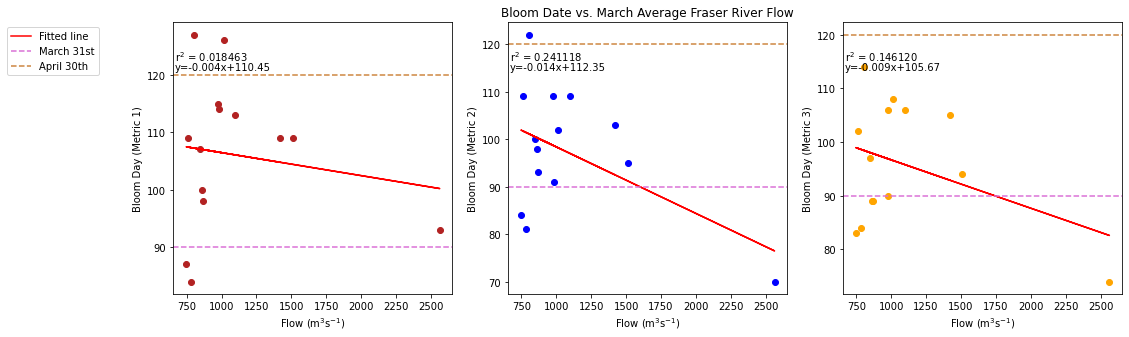

In [30]:
fraseryears=years[:-1]
fig,ax=plt.subplots(1,1,figsize=(12,5))
p1=ax.plot(years,fraserjan, '-',color='green',label='January Average')
p2=ax.plot(years,fraserfeb, '-',color='c',label='February Average')
p3=ax.plot(years,frasermar, '-',color='orchid',label='March Average')
ax.set_ylabel('Flow (m$^3$s$^{-1}$)')
ax.set_xlabel('Year')
ax.set_title('Fraser River Flow by Year')
ax.set_xticks([2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020])
ax.legend(handles=[p1[0],p2[0],p3[0]],bbox_to_anchor=(-0.25, 1.0), loc='upper left')
ax.invert_yaxis()

ax1=ax.twinx()
p4=ax1.plot(years,yearday1, 'o',color='firebrick',label='Metric1')
p5=ax1.plot(years,yearday2, 'o',color='b',label='Metric2')
p6=ax1.plot(years,yearday3, 'o',color='orange',label='Metric3')
ax1.set_ylabel('Year Day')
ax1.legend(handles=[p4[0],p5[0],p6[0]],bbox_to_anchor=(1.05, 1.0), loc='upper left')

# JAN
fig2,ax2=plt.subplots(1,3,figsize=(17,5))
ax2[0].plot(fraserjan,yearday1,'o',color='firebrick')
ax2[0].set_xlabel('Flow (m$^3$s$^{-1}$)')
ax2[0].set_ylabel('Bloom Day (Metric 1)')
y,r2,m,b=bloomdrivers.reg_r2(fraserjan,yearday1)
ax2[0].plot(fraserjan, y, 'r', label='Fitted line')
ax2[0].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax.transAxes)
ax2[0].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax.transAxes)

ax2[1].plot(fraserjan,yearday2,'o',color='b')
ax2[1].set_xlabel('Flow (m$^3$s$^{-1}$)')
ax2[1].set_ylabel('Bloom Day (Metric 2)')
y,r2,m,b=bloomdrivers.reg_r2(fraserjan,yearday2)
ax2[1].plot(fraserjan, y, 'r', label='Fitted line')
ax2[1].text(0.6, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax.transAxes)
ax2[1].text(0.6,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax.transAxes)

ax2[2].plot(fraserjan,yearday3,'o',color='orange')
ax2[2].set_xlabel('Flow (m$^3$s$^{-1}$)')
ax2[2].set_ylabel('Bloom Day (Metric 3)')
ax2[1].set_title('Bloom Date vs. January Average Fraser River Flow')
y,r2,m,b=bloomdrivers.reg_r2(fraserjan,yearday3)
ax2[2].plot(fraserjan, y, 'r', label='Fitted line')
ax2[2].text(1.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax.transAxes)
ax2[2].text(1.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax.transAxes)

# FEB
fig3,ax3=plt.subplots(1,3,figsize=(17,5))
ax3[0].plot(fraserfeb,yearday1,'o',color='firebrick')
ax3[0].set_xlabel('Flow (m$^3$s$^{-1}$)')
ax3[0].set_ylabel('Bloom Day (Metric 1)')
y,r2,m,b=bloomdrivers.reg_r2(fraserfeb,yearday1)
ax3[0].plot(fraserfeb, y, 'r', label='Fitted line')
ax3[0].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax.transAxes)
ax3[0].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax.transAxes)


ax3[1].plot(fraserfeb,yearday2,'o',color='b')
ax3[1].set_xlabel('Flow (m$^3$s$^{-1}$)')
ax3[1].set_ylabel('Bloom Day (Metric 2)')
y,r2,m,b=bloomdrivers.reg_r2(fraserfeb,yearday2)
ax3[1].plot(fraserfeb, y, 'r', label='Fitted line')
ax3[1].text(0.6, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax.transAxes)
ax3[1].text(0.6,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax.transAxes)

ax3[2].plot(fraserfeb,yearday3,'o',color='orange')
ax3[2].set_xlabel('Flow (m$^3$s$^{-1}$)')
ax3[2].set_ylabel('Bloom Day (Metric 3)')
ax3[1].set_title('Bloom Date vs. February Average Fraser River Flow')
y,r2,m,b=bloomdrivers.reg_r2(fraserfeb,yearday3)
ax3[2].plot(fraserfeb, y, 'r', label='Fitted line')
ax3[2].text(1.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax.transAxes)
ax3[2].text(1.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax.transAxes)

# MAR
fig4,ax4=plt.subplots(1,3,figsize=(17,5))
ax4[0].plot(frasermar,yearday1,'o',color='firebrick')
ax4[0].set_xlabel('Flow (m$^3$s$^{-1}$)')
ax4[0].set_ylabel('Bloom Day (Metric 1)')
y,r2,m,b=bloomdrivers.reg_r2(frasermar,yearday1)
ax4[0].plot(frasermar, y, 'r', label='Fitted line')
ax4[0].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax.transAxes)
ax4[0].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax.transAxes)

ax4[1].plot(frasermar,yearday2,'o',color='b')
ax4[1].set_xlabel('Flow (m$^3$s$^{-1}$)')
ax4[1].set_ylabel('Bloom Day (Metric 2)')
y,r2,m,b=bloomdrivers.reg_r2(frasermar,yearday2)
ax4[1].plot(frasermar, y, 'r', label='Fitted line')
ax4[1].text(0.6, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax.transAxes)
ax4[1].text(0.6,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax.transAxes)

ax4[2].plot(frasermar,yearday3,'o',color='orange')
ax4[2].set_xlabel('Flow (m$^3$s$^{-1}$)')
ax4[2].set_ylabel('Bloom Day (Metric 3)')
ax4[1].set_title('Bloom Date vs. March Average Fraser River Flow')
y,r2,m,b=bloomdrivers.reg_r2(frasermar,yearday3)
ax4[2].plot(frasermar, y, 'r', label='Fitted line')
ax4[2].text(1.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax.transAxes)
ax4[2].text(1.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax.transAxes)

# Jan month lines
ax2[0].axhline(y=90, color='orchid', linestyle='--',label='March 31st')
ax2[0].axhline(y=120, color='peru', linestyle='--',label='April 30th')
#ax2[0].axhline(y=151, color='lime', linestyle='--',label='May 31st')
ax2[0].legend(bbox_to_anchor=(-0.25, 1.0))
ax2[1].axhline(y=90, color='orchid', linestyle='--')
ax2[2].axhline(y=90, color='orchid', linestyle='--',label='March 31st')
ax2[1].axhline(y=120, color='peru', linestyle='--')
ax2[2].axhline(y=120, color='peru', linestyle='--',label='April 30th')
# Feb month lines
ax3[0].axhline(y=90, color='orchid', linestyle='--',label='March 31st')
ax3[0].axhline(y=120, color='peru', linestyle='--',label='April 30th')
#ax3[0].axhline(y=151, color='lime', linestyle='--',label='May 31st')
ax3[0].legend(bbox_to_anchor=(-0.25, 1.0))
ax3[1].axhline(y=90, color='orchid', linestyle='--')
ax3[2].axhline(y=90, color='orchid', linestyle='--',label='March 31st')
ax3[1].axhline(y=120, color='peru', linestyle='--')
ax3[2].axhline(y=120, color='peru', linestyle='--',label='April 30th')
# March month lines
ax4[0].axhline(y=90, color='orchid', linestyle='--',label='March 31st')
ax4[0].axhline(y=120, color='peru', linestyle='--',label='April 30th')
#ax4[0].axhline(y=151, color='lime', linestyle='--',label='May 31st'https://open.spotify.com/track/5la5PTcDm8oQuzHX9ssVZf)
ax4[0].legend(bbox_to_anchor=(-0.25, 1.0))
ax4[1].axhline(y=90, color='orchid', linestyle='--')
ax4[2].axhline(y=90, color='orchid', linestyle='--',label='March 31st')
ax4[1].axhline(y=120, color='peru', linestyle='--')
ax4[2].axhline(y=120, color='peru', linestyle='--',label='April 30th')

### Monthly average surface zooplankton concentration (January-March)

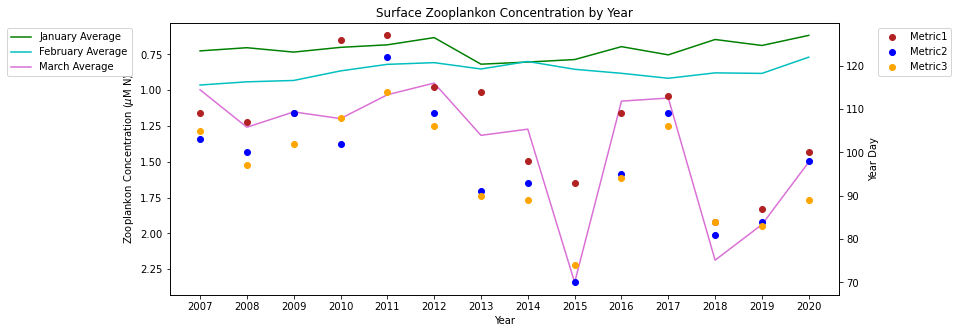

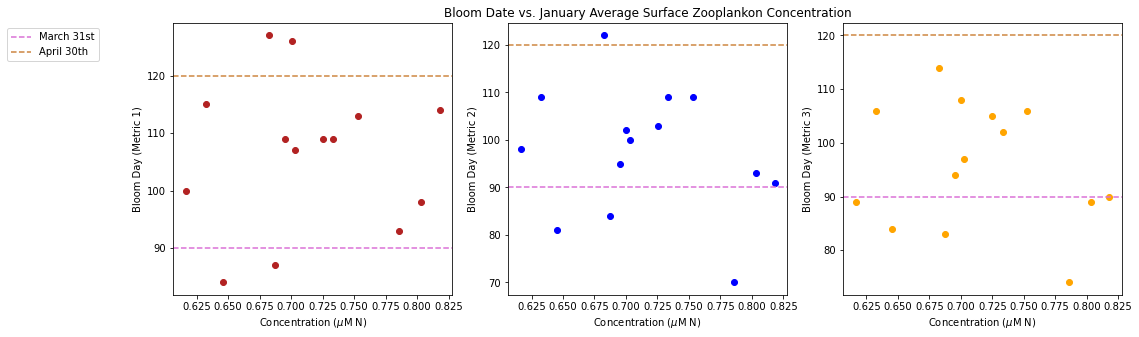

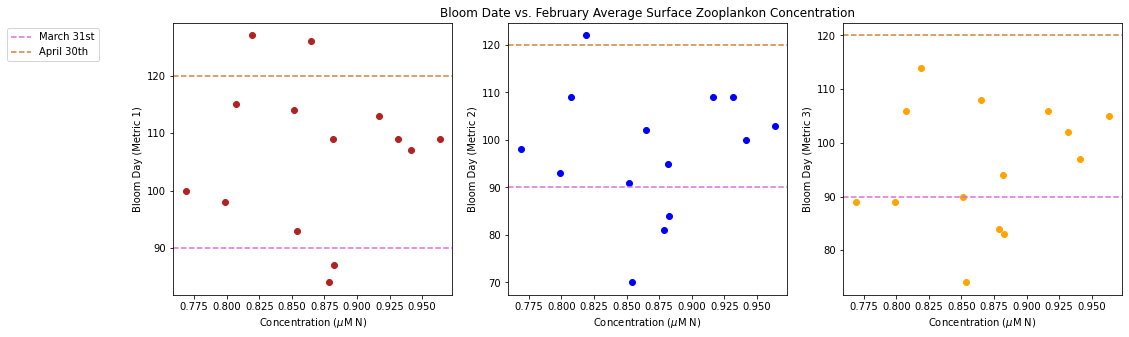

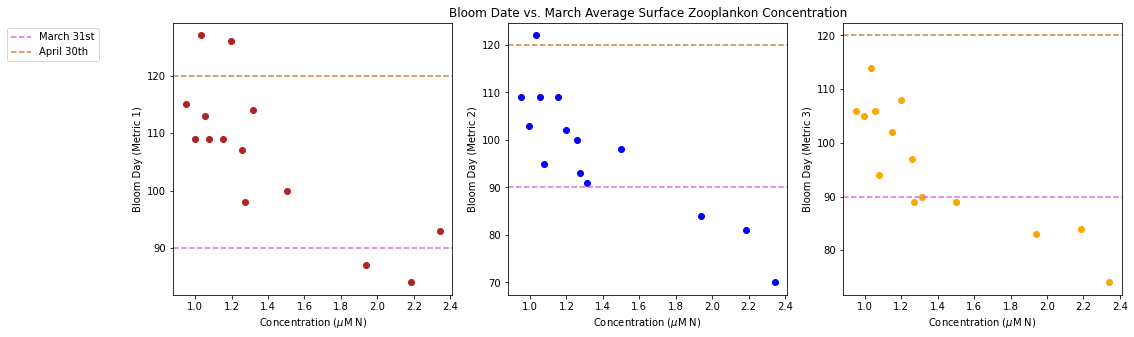

In [40]:
fig,ax=plt.subplots(1,1,figsize=(12,5))
p1=ax.plot(years,zoojan, '-',color='green',label='January Average')
p2=ax.plot(years,zoofeb, '-',color='c',label='February Average')
p3=ax.plot(years,zoomar, '-',color='orchid',label='March Average')
ax.set_ylabel('Zooplankon Concentration ($\mu$M N)')
ax.set_xlabel('Year')
ax.set_title('Surface Zooplankon Concentration by Year')
ax.set_xticks([2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020])
ax.legend(handles=[p1[0],p2[0],p3[0]],bbox_to_anchor=(-0.25, 1.0), loc='upper left')
ax.invert_yaxis()

ax1=ax.twinx()
p4=ax1.plot(years,yearday1, 'o',color='firebrick',label='Metric1')
p5=ax1.plot(years,yearday2, 'o',color='b',label='Metric2')
p6=ax1.plot(years,yearday3, 'o',color='orange',label='Metric3')
ax1.set_ylabel('Year Day')
ax1.legend(handles=[p4[0],p5[0],p6[0]],bbox_to_anchor=(1.05, 1.0), loc='upper left')

fig2,ax2=plt.subplots(1,3,figsize=(17,5))
ax2[0].plot(zoojan,yearday1,'o',color='firebrick')
ax2[0].set_xlabel('Concentration ($\mu$M N)')
ax2[0].set_ylabel('Bloom Day (Metric 1)')
ax2[1].plot(zoojan,yearday2,'o',color='b')
ax2[1].set_xlabel('Concentration ($\mu$M N)')
ax2[1].set_ylabel('Bloom Day (Metric 2)')
ax2[2].plot(zoojan,yearday3,'o',color='orange')
ax2[2].set_xlabel('Concentration ($\mu$M N)')
ax2[2].set_ylabel('Bloom Day (Metric 3)')
ax2[1].set_title('Bloom Date vs. January Average Surface Zooplankon Concentration')


fig3,ax3=plt.subplots(1,3,figsize=(17,5))
ax3[0].plot(zoofeb,yearday1,'o',color='firebrick')
ax3[0].set_xlabel('Concentration ($\mu$M N)')
ax3[0].set_ylabel('Bloom Day (Metric 1)')
ax3[1].plot(zoofeb,yearday2,'o',color='b')
ax3[1].set_xlabel('Concentration ($\mu$M N)')
ax3[1].set_ylabel('Bloom Day (Metric 2)')
ax3[2].plot(zoofeb,yearday3,'o',color='orange')
ax3[2].set_xlabel('Concentration ($\mu$M N)')
ax3[2].set_ylabel('Bloom Day (Metric 3)')
ax3[1].set_title('Bloom Date vs. February Average Surface Zooplankon Concentration')


fig4,ax4=plt.subplots(1,3,figsize=(17,5))
ax4[0].plot(zoomar,yearday1,'o',color='firebrick')
ax4[0].set_xlabel('Concentration ($\mu$M N)')
ax4[0].set_ylabel('Bloom Day (Metric 1)')
ax4[1].plot(zoomar,yearday2,'o',color='b')
ax4[1].set_xlabel('Concentration ($\mu$M N)')
ax4[1].set_ylabel('Bloom Day (Metric 2)')
ax4[2].plot(zoomar,yearday3,'o',color='orange')
ax4[2].set_xlabel('Concentration ($\mu$M N)')
ax4[2].set_ylabel('Bloom Day (Metric 3)')
ax4[1].set_title('Bloom Date vs. March Average Surface Zooplankon Concentration')


# Jan month lines
ax2[0].axhline(y=90, color='orchid', linestyle='--',label='March 31st')
ax2[0].axhline(y=120, color='peru', linestyle='--',label='April 30th')
#ax2[0].axhline(y=151, color='lime', linestyle='--',label='May 31st')
ax2[0].legend(bbox_to_anchor=(-0.25, 1.0))
ax2[1].axhline(y=90, color='orchid', linestyle='--')
ax2[2].axhline(y=90, color='orchid', linestyle='--',label='March 31st')
ax2[1].axhline(y=120, color='peru', linestyle='--')
ax2[2].axhline(y=120, color='peru', linestyle='--',label='April 30th')
# Feb month lines
ax3[0].axhline(y=90, color='orchid', linestyle='--',label='March 31st')
ax3[0].axhline(y=120, color='peru', linestyle='--',label='April 30th')
#ax3[0].axhline(y=151, color='lime', linestyle='--',label='May 31st')
ax3[0].legend(bbox_to_anchor=(-0.25, 1.0))
ax3[1].axhline(y=90, color='orchid', linestyle='--')
ax3[2].axhline(y=90, color='orchid', linestyle='--',label='March 31st')
ax3[1].axhline(y=120, color='peru', linestyle='--')
ax3[2].axhline(y=120, color='peru', linestyle='--',label='April 30th')
# March month lines
ax4[0].axhline(y=90, color='orchid', linestyle='--',label='March 31st')
ax4[0].axhline(y=120, color='peru', linestyle='--',label='April 30th')
#ax4[0].axhline(y=151, color='lime', linestyle='--',label='May 31st')
ax4[0].legend(bbox_to_anchor=(-0.25, 1.0))
ax4[1].axhline(y=90, color='orchid', linestyle='--')
ax4[2].axhline(y=90, color='orchid', linestyle='--',label='March 31st')
ax4[1].axhline(y=120, color='peru', linestyle='--')
ax4[2].axhline(y=120, color='peru', linestyle='--',label='April 30th')

### Monthly average surface mesozooplankton concentration (January-March)

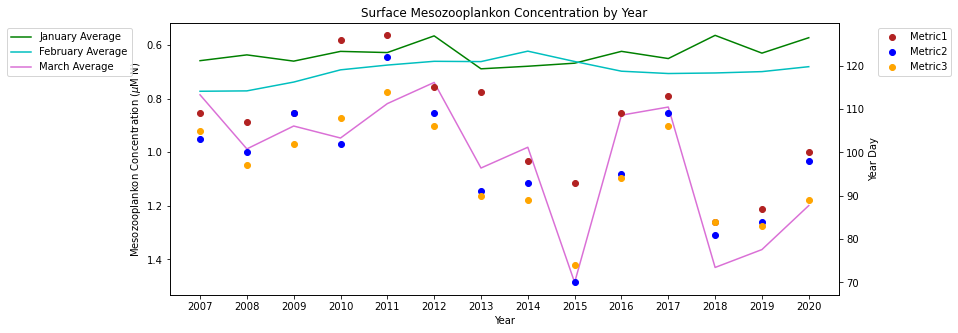

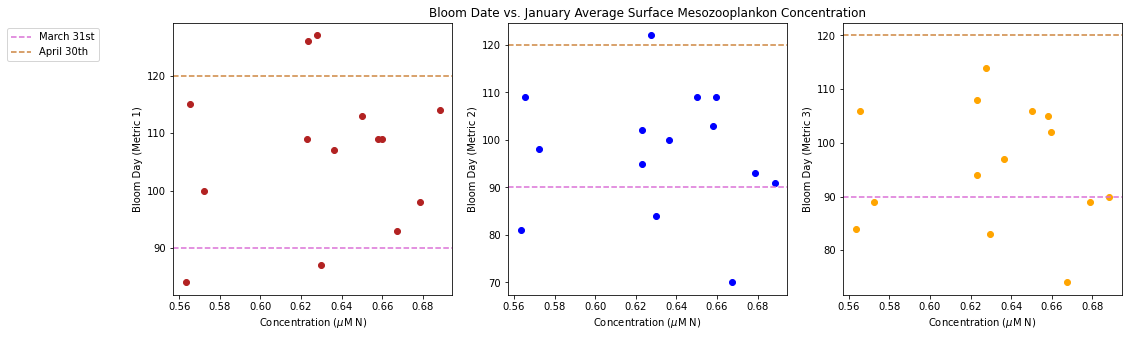

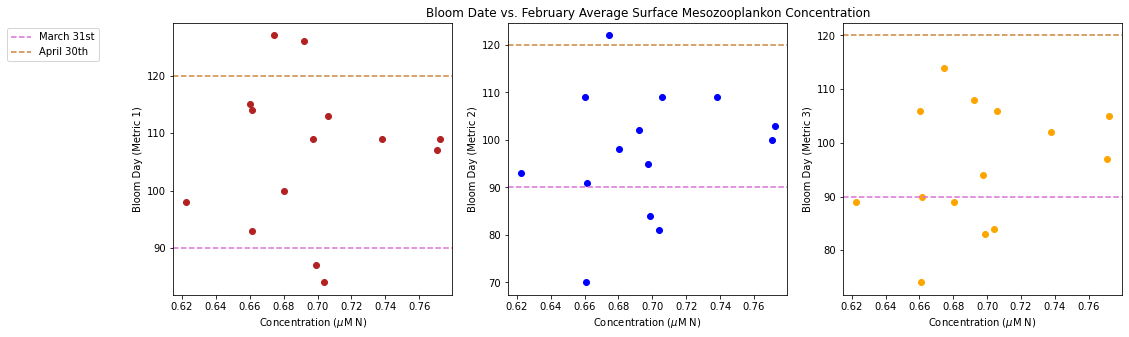

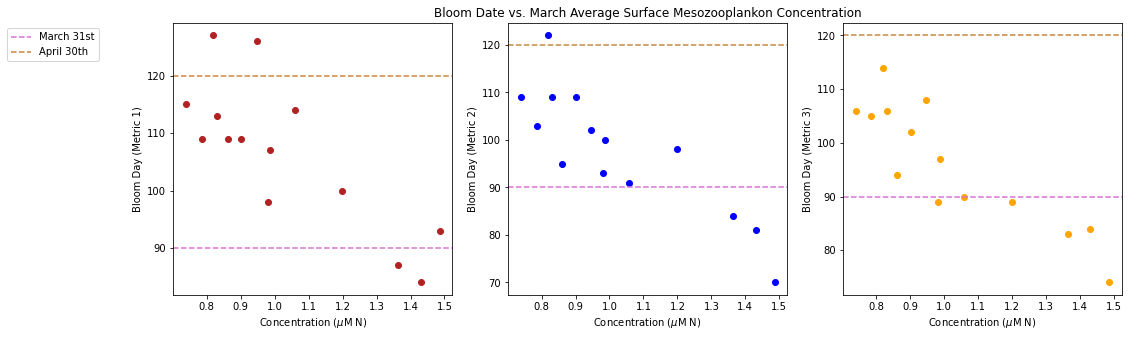

In [41]:
fig,ax=plt.subplots(1,1,figsize=(12,5))
p1=ax.plot(years,mesozoojan, '-',color='green',label='January Average')
p2=ax.plot(years,mesozoofeb, '-',color='c',label='February Average')
p3=ax.plot(years,mesozoomar, '-',color='orchid',label='March Average')
ax.set_ylabel('Mesozooplankon Concentration ($\mu$M N)')
ax.set_xlabel('Year')
ax.set_title('Surface Mesozooplankon Concentration by Year')
ax.set_xticks([2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020])
ax.legend(handles=[p1[0],p2[0],p3[0]],bbox_to_anchor=(-0.25, 1.0), loc='upper left')
ax.invert_yaxis()

ax1=ax.twinx()
p4=ax1.plot(years,yearday1, 'o',color='firebrick',label='Metric1')
p5=ax1.plot(years,yearday2, 'o',color='b',label='Metric2')
p6=ax1.plot(years,yearday3, 'o',color='orange',label='Metric3')
ax1.set_ylabel('Year Day')
ax1.legend(handles=[p4[0],p5[0],p6[0]],bbox_to_anchor=(1.05, 1.0), loc='upper left')

fig2,ax2=plt.subplots(1,3,figsize=(17,5))
ax2[0].plot(mesozoojan,yearday1,'o',color='firebrick')
ax2[0].set_xlabel('Concentration ($\mu$M N)')
ax2[0].set_ylabel('Bloom Day (Metric 1)')
ax2[1].plot(mesozoojan,yearday2,'o',color='b')
ax2[1].set_xlabel('Concentration ($\mu$M N)')
ax2[1].set_ylabel('Bloom Day (Metric 2)')
ax2[2].plot(mesozoojan,yearday3,'o',color='orange')
ax2[2].set_xlabel('Concentration ($\mu$M N)')
ax2[2].set_ylabel('Bloom Day (Metric 3)')
ax2[1].set_title('Bloom Date vs. January Average Surface Mesozooplankon Concentration')


fig3,ax3=plt.subplots(1,3,figsize=(17,5))
ax3[0].plot(mesozoofeb,yearday1,'o',color='firebrick')
ax3[0].set_xlabel('Concentration ($\mu$M N)')
ax3[0].set_ylabel('Bloom Day (Metric 1)')
ax3[1].plot(mesozoofeb,yearday2,'o',color='b')
ax3[1].set_xlabel('Concentration ($\mu$M N)')
ax3[1].set_ylabel('Bloom Day (Metric 2)')
ax3[2].plot(mesozoofeb,yearday3,'o',color='orange')
ax3[2].set_xlabel('Concentration ($\mu$M N)')
ax3[2].set_ylabel('Bloom Day (Metric 3)')
ax3[1].set_title('Bloom Date vs. February Average Surface Mesozooplankon Concentration')


fig4,ax4=plt.subplots(1,3,figsize=(17,5))
ax4[0].plot(mesozoomar,yearday1,'o',color='firebrick')
ax4[0].set_xlabel('Concentration ($\mu$M N)')
ax4[0].set_ylabel('Bloom Day (Metric 1)')
ax4[1].plot(mesozoomar,yearday2,'o',color='b')
ax4[1].set_xlabel('Concentration ($\mu$M N)')
ax4[1].set_ylabel('Bloom Day (Metric 2)')
ax4[2].plot(mesozoomar,yearday3,'o',color='orange')
ax4[2].set_xlabel('Concentration ($\mu$M N)')
ax4[2].set_ylabel('Bloom Day (Metric 3)')
ax4[1].set_title('Bloom Date vs. March Average Surface Mesozooplankon Concentration')


# Jan month lines
ax2[0].axhline(y=90, color='orchid', linestyle='--',label='March 31st')
ax2[0].axhline(y=120, color='peru', linestyle='--',label='April 30th')
#ax2[0].axhline(y=151, color='lime', linestyle='--',label='May 31st')
ax2[0].legend(bbox_to_anchor=(-0.25, 1.0))
ax2[1].axhline(y=90, color='orchid', linestyle='--')
ax2[2].axhline(y=90, color='orchid', linestyle='--',label='March 31st')
ax2[1].axhline(y=120, color='peru', linestyle='--')
ax2[2].axhline(y=120, color='peru', linestyle='--',label='April 30th')
# Feb month lines
ax3[0].axhline(y=90, color='orchid', linestyle='--',label='March 31st')
ax3[0].axhline(y=120, color='peru', linestyle='--',label='April 30th')
#ax3[0].axhline(y=151, color='lime', linestyle='--',label='May 31st')
ax3[0].legend(bbox_to_anchor=(-0.25, 1.0))
ax3[1].axhline(y=90, color='orchid', linestyle='--')
ax3[2].axhline(y=90, color='orchid', linestyle='--',label='March 31st')
ax3[1].axhline(y=120, color='peru', linestyle='--')
ax3[2].axhline(y=120, color='peru', linestyle='--',label='April 30th')
# March month lines
ax4[0].axhline(y=90, color='orchid', linestyle='--',label='March 31st')
ax4[0].axhline(y=120, color='peru', linestyle='--',label='April 30th')
#ax4[0].axhline(y=151, color='lime', linestyle='--',label='May 31st')
ax4[0].legend(bbox_to_anchor=(-0.25, 1.0))
ax4[1].axhline(y=90, color='orchid', linestyle='--')
ax4[2].axhline(y=90, color='orchid', linestyle='--',label='March 31st')
ax4[1].axhline(y=120, color='peru', linestyle='--')
ax4[2].axhline(y=120, color='peru', linestyle='--',label='April 30th')

### Monthly average surface microzooplankton concentration (January-March)

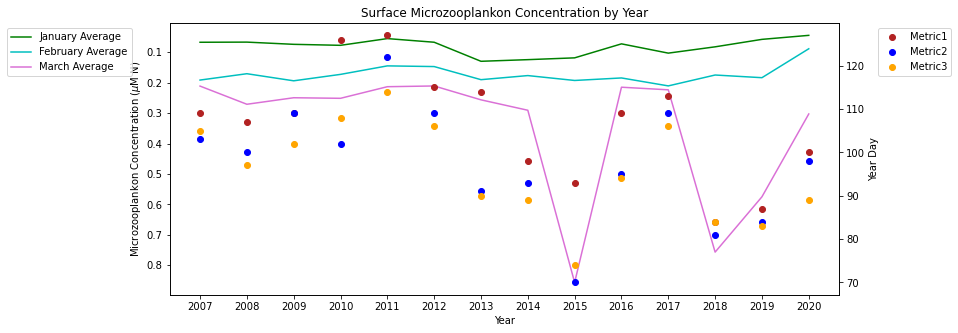

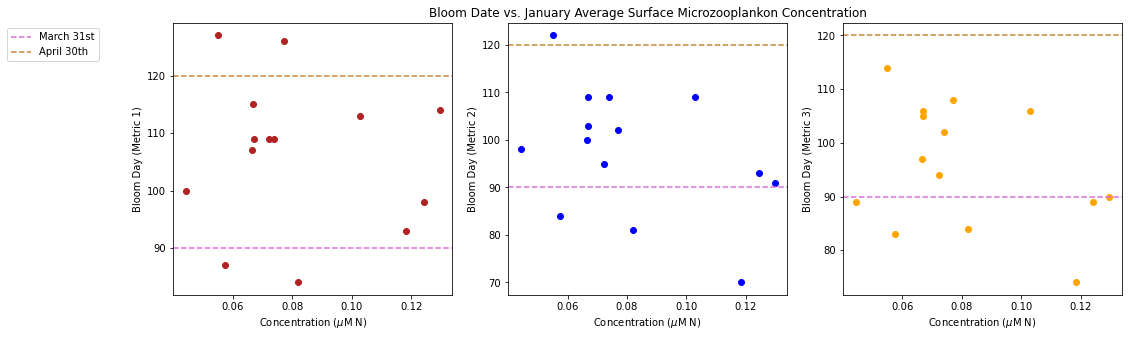

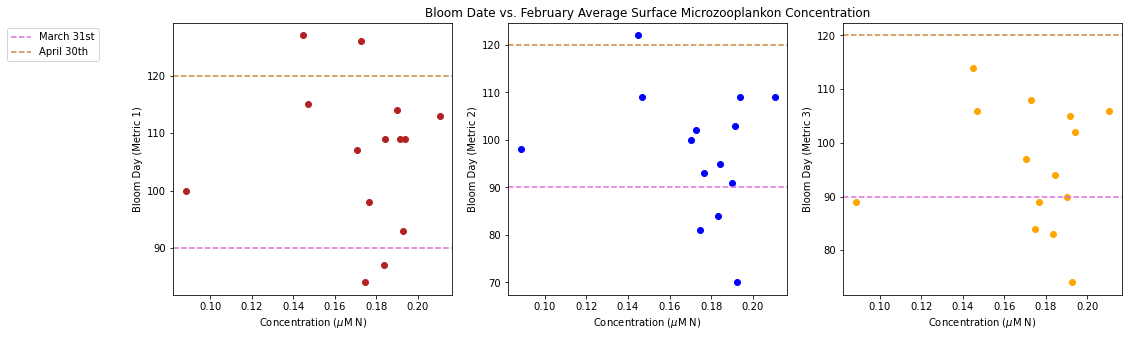

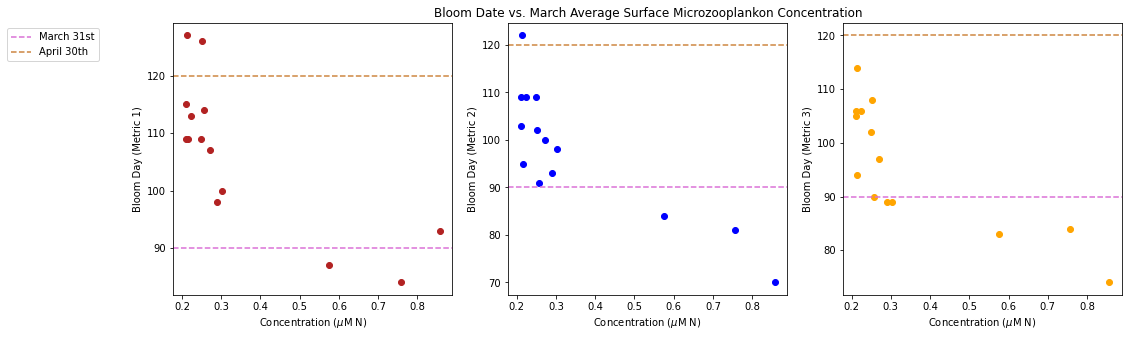

In [42]:
fig,ax=plt.subplots(1,1,figsize=(12,5))
p1=ax.plot(years,microzoojan, '-',color='green',label='January Average')
p2=ax.plot(years,microzoofeb, '-',color='c',label='February Average')
p3=ax.plot(years,microzoomar, '-',color='orchid',label='March Average')
ax.set_ylabel('Microzooplankon Concentration ($\mu$M N)')
ax.set_xlabel('Year')
ax.set_title('Surface Microzooplankon Concentration by Year')
ax.set_xticks([2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020])
ax.legend(handles=[p1[0],p2[0],p3[0]],bbox_to_anchor=(-0.25, 1.0), loc='upper left')
ax.invert_yaxis()

ax1=ax.twinx()
p4=ax1.plot(years,yearday1, 'o',color='firebrick',label='Metric1')
p5=ax1.plot(years,yearday2, 'o',color='b',label='Metric2')
p6=ax1.plot(years,yearday3, 'o',color='orange',label='Metric3')
ax1.set_ylabel('Year Day')
ax1.legend(handles=[p4[0],p5[0],p6[0]],bbox_to_anchor=(1.05, 1.0), loc='upper left')

fig2,ax2=plt.subplots(1,3,figsize=(17,5))
ax2[0].plot(microzoojan,yearday1,'o',color='firebrick')
ax2[0].set_xlabel('Concentration ($\mu$M N)')
ax2[0].set_ylabel('Bloom Day (Metric 1)')
ax2[1].plot(microzoojan,yearday2,'o',color='b')
ax2[1].set_xlabel('Concentration ($\mu$M N)')
ax2[1].set_ylabel('Bloom Day (Metric 2)')
ax2[2].plot(microzoojan,yearday3,'o',color='orange')
ax2[2].set_xlabel('Concentration ($\mu$M N)')
ax2[2].set_ylabel('Bloom Day (Metric 3)')
ax2[1].set_title('Bloom Date vs. January Average Surface Microzooplankon Concentration')


fig3,ax3=plt.subplots(1,3,figsize=(17,5))
ax3[0].plot(microzoofeb,yearday1,'o',color='firebrick')
ax3[0].set_xlabel('Concentration ($\mu$M N)')
ax3[0].set_ylabel('Bloom Day (Metric 1)')
ax3[1].plot(microzoofeb,yearday2,'o',color='b')
ax3[1].set_xlabel('Concentration ($\mu$M N)')
ax3[1].set_ylabel('Bloom Day (Metric 2)')
ax3[2].plot(microzoofeb,yearday3,'o',color='orange')
ax3[2].set_xlabel('Concentration ($\mu$M N)')
ax3[2].set_ylabel('Bloom Day (Metric 3)')
ax3[1].set_title('Bloom Date vs. February Average Surface Microzooplankon Concentration')

fig4,ax4=plt.subplots(1,3,figsize=(17,5))
ax4[0].plot(microzoomar,yearday1,'o',color='firebrick')
ax4[0].set_xlabel('Concentration ($\mu$M N)')
ax4[0].set_ylabel('Bloom Day (Metric 1)')
ax4[1].plot(microzoomar,yearday2,'o',color='b')
ax4[1].set_xlabel('Concentration ($\mu$M N)')
ax4[1].set_ylabel('Bloom Day (Metric 2)')
ax4[2].plot(microzoomar,yearday3,'o',color='orange')
ax4[2].set_xlabel('Concentration ($\mu$M N)')
ax4[2].set_ylabel('Bloom Day (Metric 3)')
ax4[1].set_title('Bloom Date vs. March Average Surface Microzooplankon Concentration')


# Jan month lines
ax2[0].axhline(y=90, color='orchid', linestyle='--',label='March 31st')
ax2[0].axhline(y=120, color='peru', linestyle='--',label='April 30th')
#ax2[0].axhline(y=151, color='lime', linestyle='--',label='May 31st')
ax2[0].legend(bbox_to_anchor=(-0.25, 1.0))
ax2[1].axhline(y=90, color='orchid', linestyle='--')
ax2[2].axhline(y=90, color='orchid', linestyle='--',label='March 31st')
ax2[1].axhline(y=120, color='peru', linestyle='--')
ax2[2].axhline(y=120, color='peru', linestyle='--',label='April 30th')
# Feb month lines
ax3[0].axhline(y=90, color='orchid', linestyle='--',label='March 31st')
ax3[0].axhline(y=120, color='peru', linestyle='--',label='April 30th')
#ax3[0].axhline(y=151, color='lime', linestyle='--',label='May 31st')
ax3[0].legend(bbox_to_anchor=(-0.25, 1.0))
ax3[1].axhline(y=90, color='orchid', linestyle='--')
ax3[2].axhline(y=90, color='orchid', linestyle='--',label='March 31st')
ax3[1].axhline(y=120, color='peru', linestyle='--')
ax3[2].axhline(y=120, color='peru', linestyle='--',label='April 30th')
# March month lines
ax4[0].axhline(y=90, color='orchid', linestyle='--',label='March 31st')
ax4[0].axhline(y=120, color='peru', linestyle='--',label='April 30th')
#ax4[0].axhline(y=151, color='lime', linestyle='--',label='May 31st')
ax4[0].legend(bbox_to_anchor=(-0.25, 1.0))
ax4[1].axhline(y=90, color='orchid', linestyle='--')
ax4[2].axhline(y=90, color='orchid', linestyle='--',label='March 31st')
ax4[1].axhline(y=120, color='peru', linestyle='--')
ax4[2].axhline(y=120, color='peru', linestyle='--',label='April 30th')

### Monthly average depth-integrated zooplankton concentration (January-March)

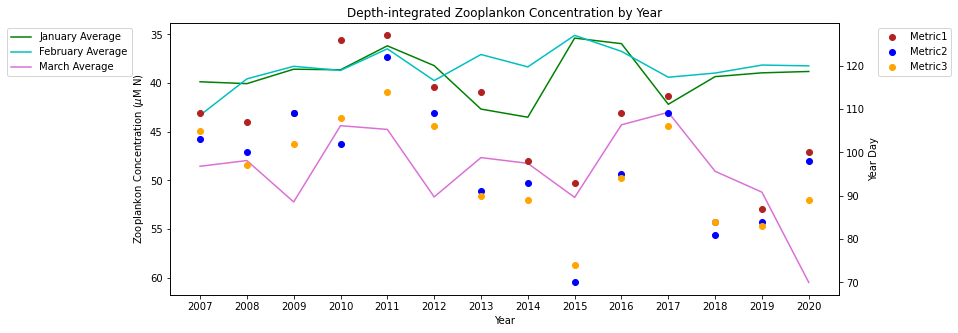

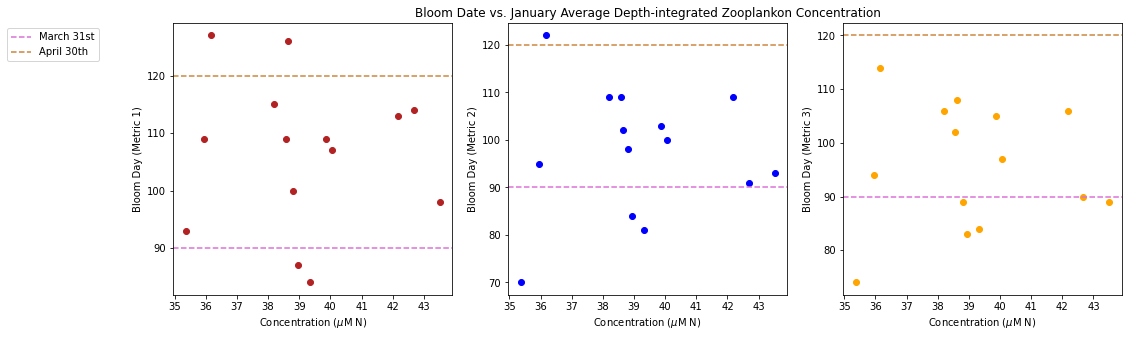

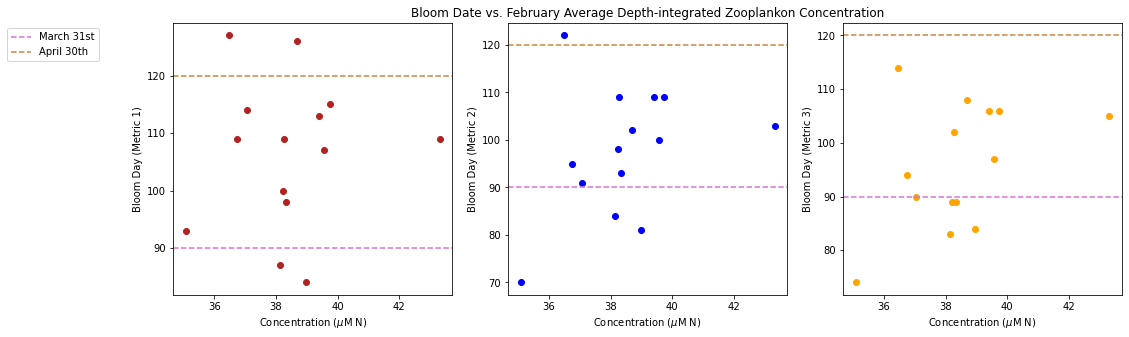

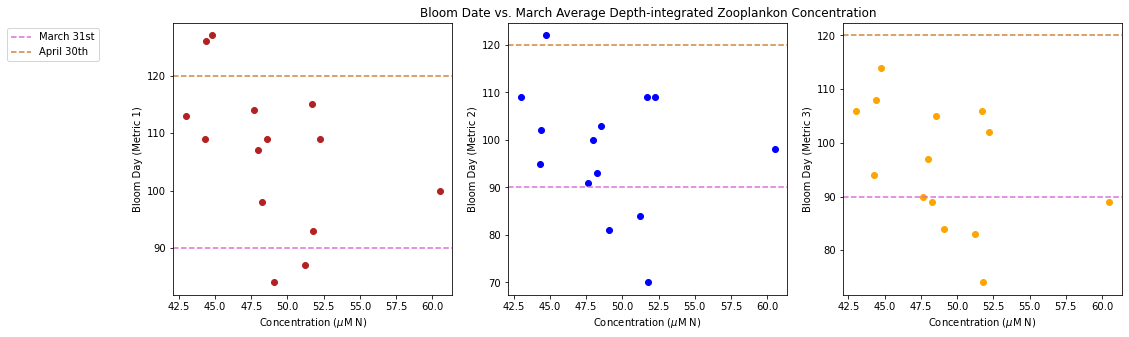

In [43]:
fig,ax=plt.subplots(1,1,figsize=(12,5))
p1=ax.plot(years,intzoojan, '-',color='green',label='January Average')
p2=ax.plot(years,intzoofeb, '-',color='c',label='February Average')
p3=ax.plot(years,intzoomar, '-',color='orchid',label='March Average')
ax.set_ylabel('Zooplankon Concentration ($\mu$M N)')
ax.set_xlabel('Year')
ax.set_title('Depth-integrated Zooplankon Concentration by Year')
ax.set_xticks([2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020])
ax.legend(handles=[p1[0],p2[0],p3[0]],bbox_to_anchor=(-0.25, 1.0), loc='upper left')
ax.invert_yaxis()

ax1=ax.twinx()
p4=ax1.plot(years,yearday1, 'o',color='firebrick',label='Metric1')
p5=ax1.plot(years,yearday2, 'o',color='b',label='Metric2')
p6=ax1.plot(years,yearday3, 'o',color='orange',label='Metric3')
ax1.set_ylabel('Year Day')
ax1.legend(handles=[p4[0],p5[0],p6[0]],bbox_to_anchor=(1.05, 1.0), loc='upper left')

fig2,ax2=plt.subplots(1,3,figsize=(17,5))
ax2[0].plot(intzoojan,yearday1,'o',color='firebrick')
ax2[0].set_xlabel('Concentration ($\mu$M N)')
ax2[0].set_ylabel('Bloom Day (Metric 1)')
ax2[1].plot(intzoojan,yearday2,'o',color='b')
ax2[1].set_xlabel('Concentration ($\mu$M N)')
ax2[1].set_ylabel('Bloom Day (Metric 2)')
ax2[2].plot(intzoojan,yearday3,'o',color='orange')
ax2[2].set_xlabel('Concentration ($\mu$M N)')
ax2[2].set_ylabel('Bloom Day (Metric 3)')
ax2[1].set_title('Bloom Date vs. January Average Depth-integrated Zooplankon Concentration')


fig3,ax3=plt.subplots(1,3,figsize=(17,5))
ax3[0].plot(intzoofeb,yearday1,'o',color='firebrick')
ax3[0].set_xlabel('Concentration ($\mu$M N)')
ax3[0].set_ylabel('Bloom Day (Metric 1)')
ax3[1].plot(intzoofeb,yearday2,'o',color='b')
ax3[1].set_xlabel('Concentration ($\mu$M N)')
ax3[1].set_ylabel('Bloom Day (Metric 2)')
ax3[2].plot(intzoofeb,yearday3,'o',color='orange')
ax3[2].set_xlabel('Concentration ($\mu$M N)')
ax3[2].set_ylabel('Bloom Day (Metric 3)')
ax3[1].set_title('Bloom Date vs. February Average Depth-integrated Zooplankon Concentration')


fig4,ax4=plt.subplots(1,3,figsize=(17,5))
ax4[0].plot(intzoomar,yearday1,'o',color='firebrick')
ax4[0].set_xlabel('Concentration ($\mu$M N)')
ax4[0].set_ylabel('Bloom Day (Metric 1)')
ax4[1].plot(intzoomar,yearday2,'o',color='b')
ax4[1].set_xlabel('Concentration ($\mu$M N)')
ax4[1].set_ylabel('Bloom Day (Metric 2)')
ax4[2].plot(intzoomar,yearday3,'o',color='orange')
ax4[2].set_xlabel('Concentration ($\mu$M N)')
ax4[2].set_ylabel('Bloom Day (Metric 3)')
ax4[1].set_title('Bloom Date vs. March Average Depth-integrated Zooplankon Concentration')


# Jan month lines
ax2[0].axhline(y=90, color='orchid', linestyle='--',label='March 31st')
ax2[0].axhline(y=120, color='peru', linestyle='--',label='April 30th')
#ax2[0].axhline(y=151, color='lime', linestyle='--',label='May 31st')
ax2[0].legend(bbox_to_anchor=(-0.25, 1.0))
ax2[1].axhline(y=90, color='orchid', linestyle='--')
ax2[2].axhline(y=90, color='orchid', linestyle='--',label='March 31st')
ax2[1].axhline(y=120, color='peru', linestyle='--')
ax2[2].axhline(y=120, color='peru', linestyle='--',label='April 30th')
# Feb month lines
ax3[0].axhline(y=90, color='orchid', linestyle='--',label='March 31st')
ax3[0].axhline(y=120, color='peru', linestyle='--',label='April 30th')
#ax3[0].axhline(y=151, color='lime', linestyle='--',label='May 31st')
ax3[0].legend(bbox_to_anchor=(-0.25, 1.0))
ax3[1].axhline(y=90, color='orchid', linestyle='--')
ax3[2].axhline(y=90, color='orchid', linestyle='--',label='March 31st')
ax3[1].axhline(y=120, color='peru', linestyle='--')
ax3[2].axhline(y=120, color='peru', linestyle='--',label='April 30th')
# March month lines
ax4[0].axhline(y=90, color='orchid', linestyle='--',label='March 31st')
ax4[0].axhline(y=120, color='peru', linestyle='--',label='April 30th')
#ax4[0].axhline(y=151, color='lime', linestyle='--',label='May 31st')
ax4[0].legend(bbox_to_anchor=(-0.25, 1.0))
ax4[1].axhline(y=90, color='orchid', linestyle='--')
ax4[2].axhline(y=90, color='orchid', linestyle='--',label='March 31st')
ax4[1].axhline(y=120, color='peru', linestyle='--')
ax4[2].axhline(y=120, color='peru', linestyle='--',label='April 30th')

### Monthly average depth-integrated mesozooplankton concentration (January-March)

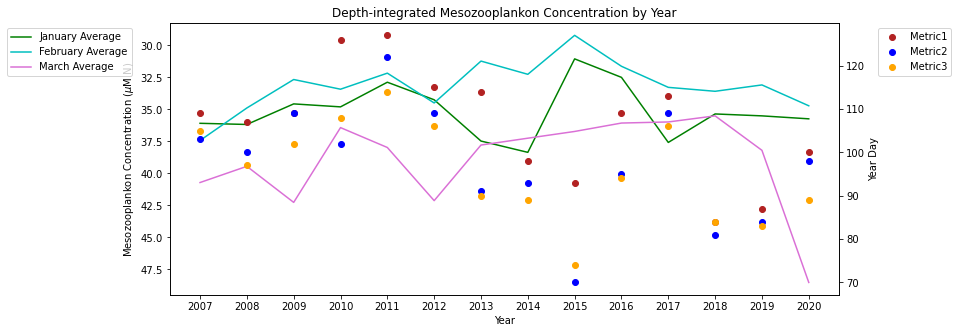

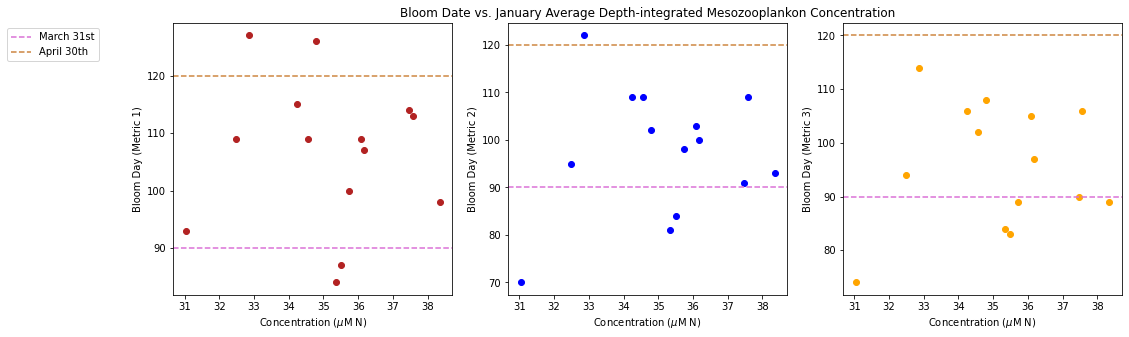

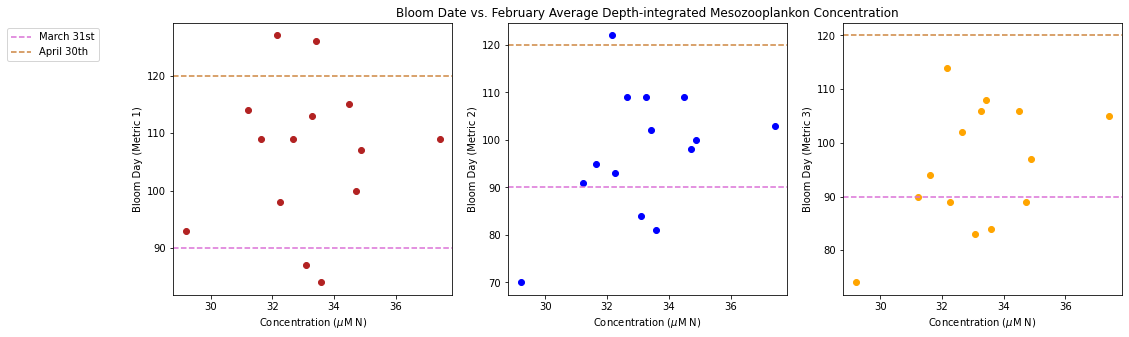

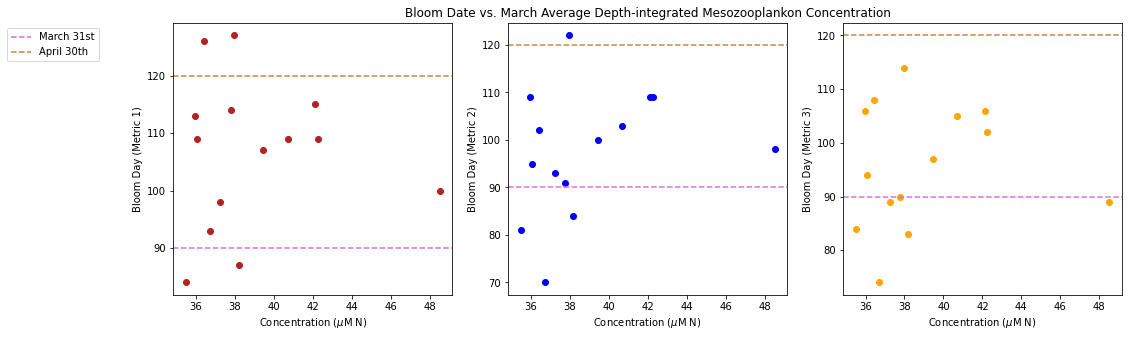

In [44]:
fig,ax=plt.subplots(1,1,figsize=(12,5))
p1=ax.plot(years,intmesozoojan, '-',color='green',label='January Average')
p2=ax.plot(years,intmesozoofeb, '-',color='c',label='February Average')
p3=ax.plot(years,intmesozoomar, '-',color='orchid',label='March Average')
ax.set_ylabel('Mesozooplankon Concentration ($\mu$M N)')
ax.set_xlabel('Year')
ax.set_title('Depth-integrated Mesozooplankon Concentration by Year')
ax.set_xticks([2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020])
ax.legend(handles=[p1[0],p2[0],p3[0]],bbox_to_anchor=(-0.25, 1.0), loc='upper left')
ax.invert_yaxis()

ax1=ax.twinx()
p4=ax1.plot(years,yearday1, 'o',color='firebrick',label='Metric1')
p5=ax1.plot(years,yearday2, 'o',color='b',label='Metric2')
p6=ax1.plot(years,yearday3, 'o',color='orange',label='Metric3')
ax1.set_ylabel('Year Day')
ax1.legend(handles=[p4[0],p5[0],p6[0]],bbox_to_anchor=(1.05, 1.0), loc='upper left')

fig2,ax2=plt.subplots(1,3,figsize=(17,5))
ax2[0].plot(intmesozoojan,yearday1,'o',color='firebrick')
ax2[0].set_xlabel('Concentration ($\mu$M N)')
ax2[0].set_ylabel('Bloom Day (Metric 1)')
ax2[1].plot(intmesozoojan,yearday2,'o',color='b')
ax2[1].set_xlabel('Concentration ($\mu$M N)')
ax2[1].set_ylabel('Bloom Day (Metric 2)')
ax2[2].plot(intmesozoojan,yearday3,'o',color='orange')
ax2[2].set_xlabel('Concentration ($\mu$M N)')
ax2[2].set_ylabel('Bloom Day (Metric 3)')
ax2[1].set_title('Bloom Date vs. January Average Depth-integrated Mesozooplankon Concentration')


fig3,ax3=plt.subplots(1,3,figsize=(17,5))
ax3[0].plot(intmesozoofeb,yearday1,'o',color='firebrick')
ax3[0].set_xlabel('Concentration ($\mu$M N)')
ax3[0].set_ylabel('Bloom Day (Metric 1)')
ax3[1].plot(intmesozoofeb,yearday2,'o',color='b')
ax3[1].set_xlabel('Concentration ($\mu$M N)')
ax3[1].set_ylabel('Bloom Day (Metric 2)')
ax3[2].plot(intmesozoofeb,yearday3,'o',color='orange')
ax3[2].set_xlabel('Concentration ($\mu$M N)')
ax3[2].set_ylabel('Bloom Day (Metric 3)')
ax3[1].set_title('Bloom Date vs. February Average Depth-integrated Mesozooplankon Concentration')


fig4,ax4=plt.subplots(1,3,figsize=(17,5))
ax4[0].plot(intmesozoomar,yearday1,'o',color='firebrick')
ax4[0].set_xlabel('Concentration ($\mu$M N)')
ax4[0].set_ylabel('Bloom Day (Metric 1)')
ax4[1].plot(intmesozoomar,yearday2,'o',color='b')
ax4[1].set_xlabel('Concentration ($\mu$M N)')
ax4[1].set_ylabel('Bloom Day (Metric 2)')
ax4[2].plot(intmesozoomar,yearday3,'o',color='orange')
ax4[2].set_xlabel('Concentration ($\mu$M N)')
ax4[2].set_ylabel('Bloom Day (Metric 3)')
ax4[1].set_title('Bloom Date vs. March Average Depth-integrated Mesozooplankon Concentration')


# Jan month lines
ax2[0].axhline(y=90, color='orchid', linestyle='--',label='March 31st')
ax2[0].axhline(y=120, color='peru', linestyle='--',label='April 30th')
#ax2[0].axhline(y=151, color='lime', linestyle='--',label='May 31st')
ax2[0].legend(bbox_to_anchor=(-0.25, 1.0))
ax2[1].axhline(y=90, color='orchid', linestyle='--')
ax2[2].axhline(y=90, color='orchid', linestyle='--',label='March 31st')
ax2[1].axhline(y=120, color='peru', linestyle='--')
ax2[2].axhline(y=120, color='peru', linestyle='--',label='April 30th')
# Feb month lines
ax3[0].axhline(y=90, color='orchid', linestyle='--',label='March 31st')
ax3[0].axhline(y=120, color='peru', linestyle='--',label='April 30th')
#ax3[0].axhline(y=151, color='lime', linestyle='--',label='May 31st')
ax3[0].legend(bbox_to_anchor=(-0.25, 1.0))
ax3[1].axhline(y=90, color='orchid', linestyle='--')
ax3[2].axhline(y=90, color='orchid', linestyle='--',label='March 31st')
ax3[1].axhline(y=120, color='peru', linestyle='--')
ax3[2].axhline(y=120, color='peru', linestyle='--',label='April 30th')
# March month lines
ax4[0].axhline(y=90, color='orchid', linestyle='--',label='March 31st')
ax4[0].axhline(y=120, color='peru', linestyle='--',label='April 30th')
#ax4[0].axhline(y=151, color='lime', linestyle='--',label='May 31st')
ax4[0].legend(bbox_to_anchor=(-0.25, 1.0))
ax4[1].axhline(y=90, color='orchid', linestyle='--')
ax4[2].axhline(y=90, color='orchid', linestyle='--',label='March 31st')
ax4[1].axhline(y=120, color='peru', linestyle='--')
ax4[2].axhline(y=120, color='peru', linestyle='--',label='April 30th')

### Monthly average depth-integrated microzooplankton concentration (January-March)

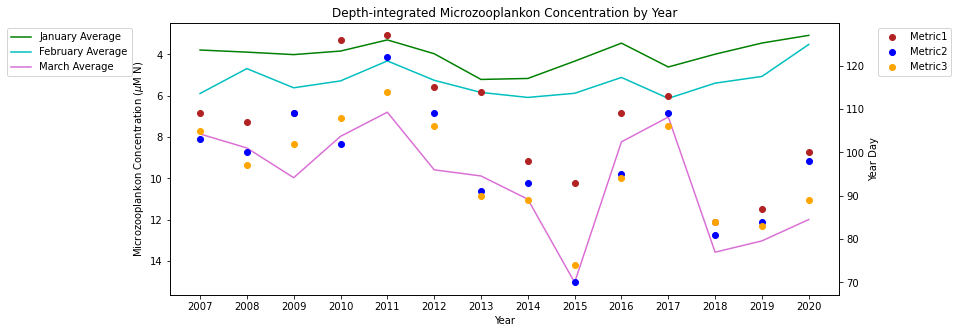

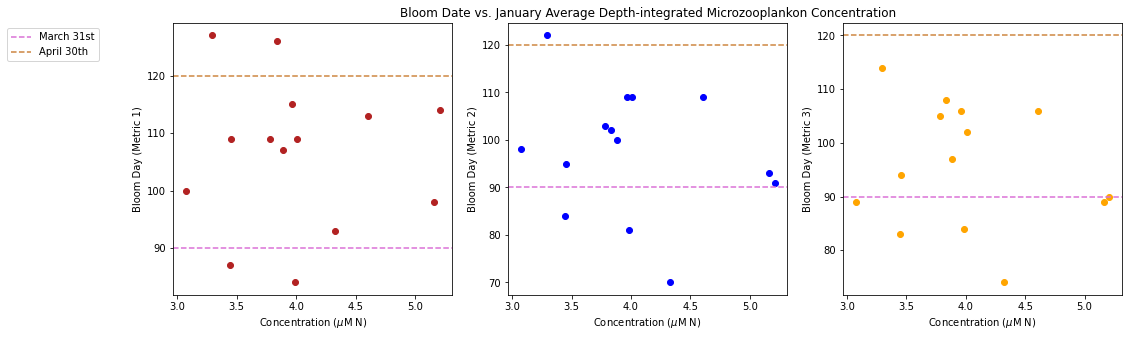

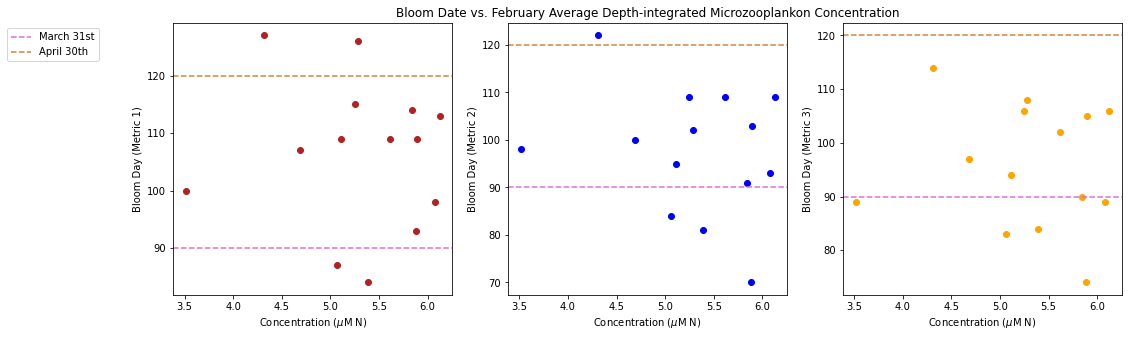

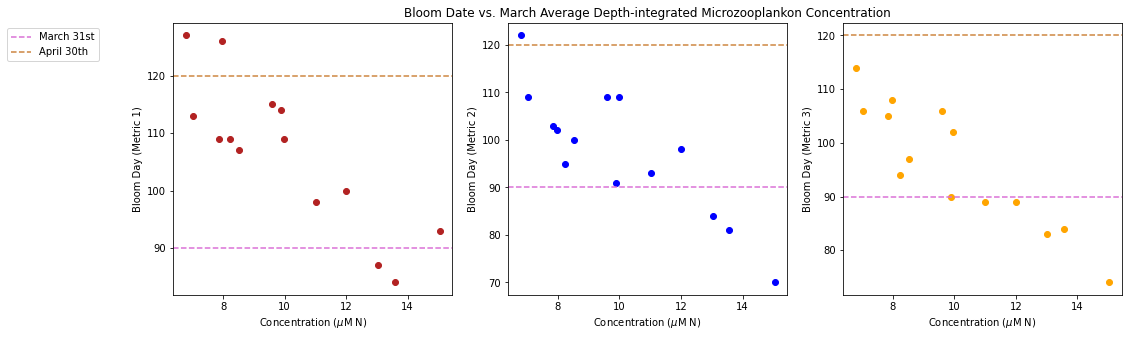

In [45]:
fig,ax=plt.subplots(1,1,figsize=(12,5))
p1=ax.plot(years,intmicrozoojan, '-',color='green',label='January Average')
p2=ax.plot(years,intmicrozoofeb, '-',color='c',label='February Average')
p3=ax.plot(years,intmicrozoomar, '-',color='orchid',label='March Average')
ax.set_ylabel('Microzooplankon Concentration ($\mu$M N)')
ax.set_xlabel('Year')
ax.set_title('Depth-integrated Microzooplankon Concentration by Year')
ax.set_xticks([2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020])
ax.legend(handles=[p1[0],p2[0],p3[0]],bbox_to_anchor=(-0.25, 1.0), loc='upper left')
ax.invert_yaxis()

ax1=ax.twinx()
p4=ax1.plot(years,yearday1, 'o',color='firebrick',label='Metric1')
p5=ax1.plot(years,yearday2, 'o',color='b',label='Metric2')
p6=ax1.plot(years,yearday3, 'o',color='orange',label='Metric3')
ax1.set_ylabel('Year Day')
ax1.legend(handles=[p4[0],p5[0],p6[0]],bbox_to_anchor=(1.05, 1.0), loc='upper left')

fig2,ax2=plt.subplots(1,3,figsize=(17,5))
ax2[0].plot(intmicrozoojan,yearday1,'o',color='firebrick')
ax2[0].set_xlabel('Concentration ($\mu$M N)')
ax2[0].set_ylabel('Bloom Day (Metric 1)')
ax2[1].plot(intmicrozoojan,yearday2,'o',color='b')
ax2[1].set_xlabel('Concentration ($\mu$M N)')
ax2[1].set_ylabel('Bloom Day (Metric 2)')
ax2[2].plot(intmicrozoojan,yearday3,'o',color='orange')
ax2[2].set_xlabel('Concentration ($\mu$M N)')
ax2[2].set_ylabel('Bloom Day (Metric 3)')
ax2[1].set_title('Bloom Date vs. January Average Depth-integrated Microzooplankon Concentration')


fig3,ax3=plt.subplots(1,3,figsize=(17,5))
ax3[0].plot(intmicrozoofeb,yearday1,'o',color='firebrick')
ax3[0].set_xlabel('Concentration ($\mu$M N)')
ax3[0].set_ylabel('Bloom Day (Metric 1)')
ax3[1].plot(intmicrozoofeb,yearday2,'o',color='b')
ax3[1].set_xlabel('Concentration ($\mu$M N)')
ax3[1].set_ylabel('Bloom Day (Metric 2)')
ax3[2].plot(intmicrozoofeb,yearday3,'o',color='orange')
ax3[2].set_xlabel('Concentration ($\mu$M N)')
ax3[2].set_ylabel('Bloom Day (Metric 3)')
ax3[1].set_title('Bloom Date vs. February Average Depth-integrated Microzooplankon Concentration')


fig4,ax4=plt.subplots(1,3,figsize=(17,5))
ax4[0].plot(intmicrozoomar,yearday1,'o',color='firebrick')
ax4[0].set_xlabel('Concentration ($\mu$M N)')
ax4[0].set_ylabel('Bloom Day (Metric 1)')
ax4[1].plot(intmicrozoomar,yearday2,'o',color='b')
ax4[1].set_xlabel('Concentration ($\mu$M N)')
ax4[1].set_ylabel('Bloom Day (Metric 2)')
ax4[2].plot(intmicrozoomar,yearday3,'o',color='orange')
ax4[2].set_xlabel('Concentration ($\mu$M N)')
ax4[2].set_ylabel('Bloom Day (Metric 3)')
ax4[1].set_title('Bloom Date vs. March Average Depth-integrated Microzooplankon Concentration')


# Jan month lines
ax2[0].axhline(y=90, color='orchid', linestyle='--',label='March 31st')
ax2[0].axhline(y=120, color='peru', linestyle='--',label='April 30th')
#ax2[0].axhline(y=151, color='lime', linestyle='--',label='May 31st')
ax2[0].legend(bbox_to_anchor=(-0.25, 1.0))
ax2[1].axhline(y=90, color='orchid', linestyle='--')
ax2[2].axhline(y=90, color='orchid', linestyle='--',label='March 31st')
ax2[1].axhline(y=120, color='peru', linestyle='--')
ax2[2].axhline(y=120, color='peru', linestyle='--',label='April 30th')
# Feb month lines
ax3[0].axhline(y=90, color='orchid', linestyle='--',label='March 31st')
ax3[0].axhline(y=120, color='peru', linestyle='--',label='April 30th')
#ax3[0].axhline(y=151, color='lime', linestyle='--',label='May 31st')
ax3[0].legend(bbox_to_anchor=(-0.25, 1.0))
ax3[1].axhline(y=90, color='orchid', linestyle='--')
ax3[2].axhline(y=90, color='orchid', linestyle='--',label='March 31st')
ax3[1].axhline(y=120, color='peru', linestyle='--')
ax3[2].axhline(y=120, color='peru', linestyle='--',label='April 30th')
# March month lines
ax4[0].axhline(y=90, color='orchid', linestyle='--',label='March 31st')
ax4[0].axhline(y=120, color='peru', linestyle='--',label='April 30th')
#ax4[0].axhline(y=151, color='lime', linestyle='--',label='May 31st')
ax4[0].legend(bbox_to_anchor=(-0.25, 1.0))
ax4[1].axhline(y=90, color='orchid', linestyle='--')
ax4[2].axhline(y=90, color='orchid', linestyle='--',label='March 31st')
ax4[1].axhline(y=120, color='peru', linestyle='--')
ax4[2].axhline(y=120, color='peru', linestyle='--',label='April 30th')

### Mid-Depth Nitrate (30-90m)

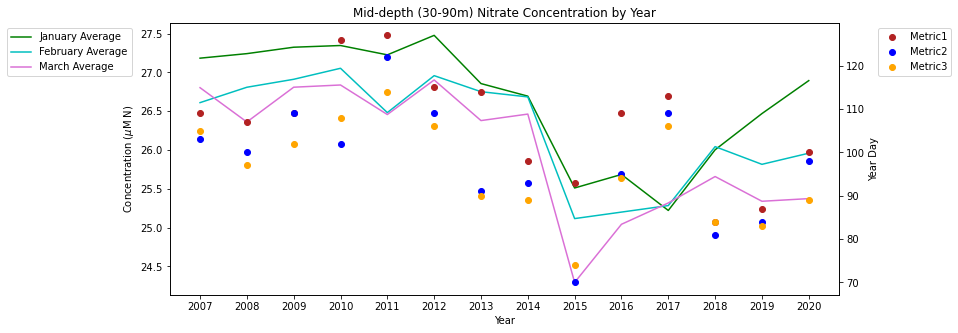

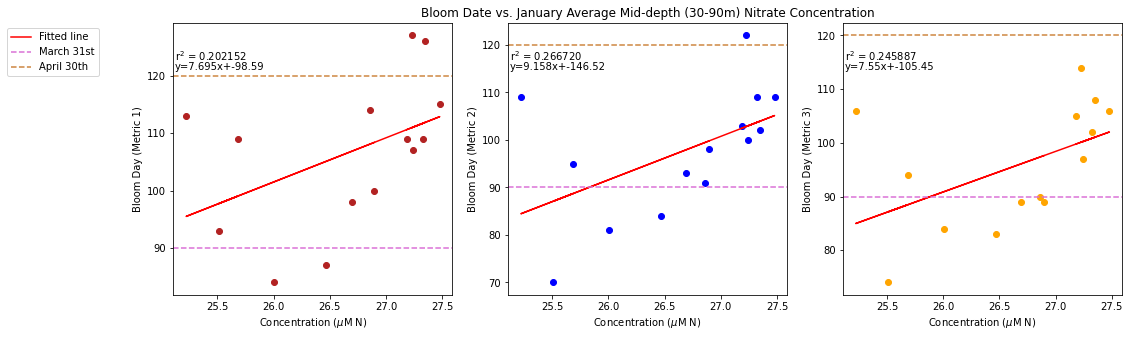

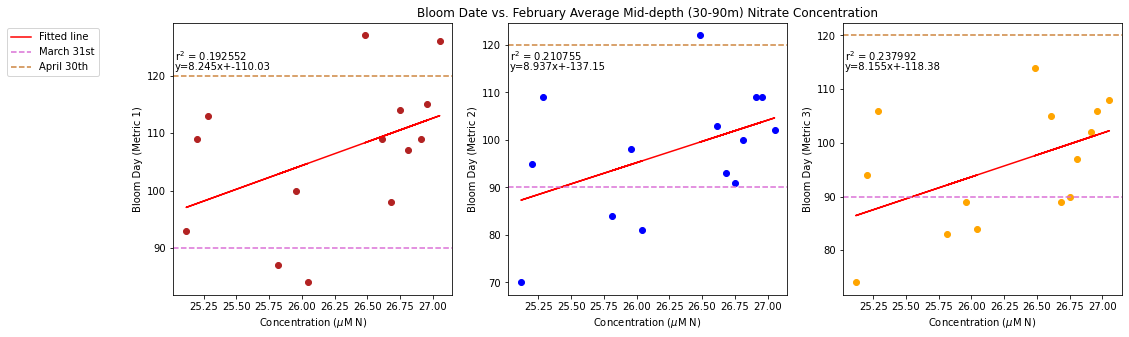

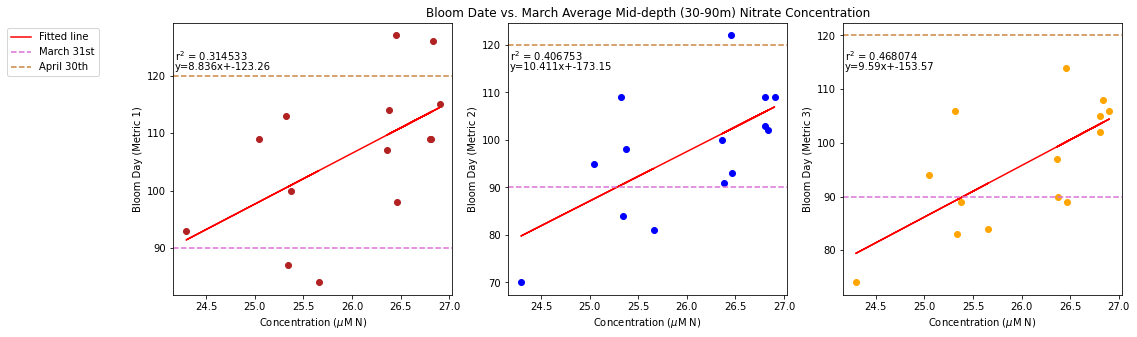

In [31]:
fig,ax=plt.subplots(1,1,figsize=(12,5))
p1=ax.plot(years,midno3jan, '-',color='green',label='January Average')
p2=ax.plot(years,midno3feb, '-',color='c',label='February Average')
p3=ax.plot(years,midno3mar, '-',color='orchid',label='March Average')
ax.set_ylabel('Concentration ($\mu$M N)')
ax.set_xlabel('Year')
ax.set_title('Mid-depth (30-90m) Nitrate Concentration by Year')
ax.set_xticks([2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020])
ax.legend(handles=[p1[0],p2[0],p3[0]],bbox_to_anchor=(-0.25, 1.0), loc='upper left')

ax1=ax.twinx()
p4=ax1.plot(years,yearday1, 'o',color='firebrick',label='Metric1')
p5=ax1.plot(years,yearday2, 'o',color='b',label='Metric2')
p6=ax1.plot(years,yearday3, 'o',color='orange',label='Metric3')
ax1.set_ylabel('Year Day')
ax1.legend(handles=[p4[0],p5[0],p6[0]],bbox_to_anchor=(1.05, 1.0), loc='upper left')

#JAN
fig2,ax2=plt.subplots(1,3,figsize=(17,5))
ax2[0].plot(midno3jan,yearday1,'o',color='firebrick')
ax2[0].set_xlabel('Concentration ($\mu$M N)')
ax2[0].set_ylabel('Bloom Day (Metric 1)')
y,r2,m,b=bloomdrivers.reg_r2(midno3jan,yearday1)
ax2[0].plot(midno3jan, y, 'r', label='Fitted line')
ax2[0].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax.transAxes)
ax2[0].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax.transAxes)

ax2[1].plot(midno3jan,yearday2,'o',color='b')
ax2[1].set_xlabel('Concentration ($\mu$M N)')
ax2[1].set_ylabel('Bloom Day (Metric 2)')
y,r2,m,b=bloomdrivers.reg_r2(midno3jan,yearday2)
ax2[1].plot(midno3jan, y, 'r', label='Fitted line')
ax2[1].text(0.6, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax.transAxes)
ax2[1].text(0.6,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax.transAxes)

ax2[2].plot(midno3jan,yearday3,'o',color='orange')
ax2[2].set_xlabel('Concentration ($\mu$M N)')
ax2[2].set_ylabel('Bloom Day (Metric 3)')
ax2[1].set_title('Bloom Date vs. January Average Mid-depth (30-90m) Nitrate Concentration')
y,r2,m,b=bloomdrivers.reg_r2(midno3jan,yearday3)
ax2[2].plot(midno3jan, y, 'r', label='Fitted line')
ax2[2].text(1.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax.transAxes)
ax2[2].text(1.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax.transAxes)

# FEB
fig3,ax3=plt.subplots(1,3,figsize=(17,5))
ax3[0].plot(midno3feb,yearday1,'o',color='firebrick')
ax3[0].set_xlabel('Concentration ($\mu$M N)')
ax3[0].set_ylabel('Bloom Day (Metric 1)')
y,r2,m,b=bloomdrivers.reg_r2(midno3feb,yearday1)
ax3[0].plot(midno3feb, y, 'r', label='Fitted line')
ax3[0].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax.transAxes)
ax3[0].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax.transAxes)

ax3[1].plot(midno3feb,yearday2,'o',color='b')
ax3[1].set_xlabel('Concentration ($\mu$M N)')
ax3[1].set_ylabel('Bloom Day (Metric 2)')
y,r2,m,b=bloomdrivers.reg_r2(midno3feb,yearday2)
ax3[1].plot(midno3feb, y, 'r', label='Fitted line')
ax3[1].text(0.6, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax.transAxes)
ax3[1].text(0.6,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax.transAxes)


ax3[2].plot(midno3feb,yearday3,'o',color='orange')
ax3[2].set_xlabel('Concentration ($\mu$M N)')
ax3[2].set_ylabel('Bloom Day (Metric 3)')
ax3[1].set_title('Bloom Date vs. February Average Mid-depth (30-90m) Nitrate Concentration')
y,r2,m,b=bloomdrivers.reg_r2(midno3feb,yearday3)
ax3[2].plot(midno3feb, y, 'r', label='Fitted line')
ax3[2].text(1.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax.transAxes)
ax3[2].text(1.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax.transAxes)

# MAR
fig4,ax4=plt.subplots(1,3,figsize=(17,5))
ax4[0].plot(midno3mar,yearday1,'o',color='firebrick')
ax4[0].set_xlabel('Concentration ($\mu$M N)')
ax4[0].set_ylabel('Bloom Day (Metric 1)')
y,r2,m,b=bloomdrivers.reg_r2(midno3mar,yearday1)
ax4[0].plot(midno3mar, y, 'r', label='Fitted line')
ax4[0].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax.transAxes)
ax4[0].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax.transAxes)

ax4[1].plot(midno3mar,yearday2,'o',color='b')
ax4[1].set_xlabel('Concentration ($\mu$M N)')
ax4[1].set_ylabel('Bloom Day (Metric 2)')
y,r2,m,b=bloomdrivers.reg_r2(midno3mar,yearday2)
ax4[1].plot(midno3mar, y, 'r', label='Fitted line')
ax4[1].text(0.6, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax.transAxes)
ax4[1].text(0.6,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax.transAxes)

ax4[2].plot(midno3mar,yearday3,'o',color='orange')
ax4[2].set_xlabel('Concentration ($\mu$M N)')
ax4[2].set_ylabel('Bloom Day (Metric 3)')
ax4[1].set_title('Bloom Date vs. March Average Mid-depth (30-90m) Nitrate Concentration')
y,r2,m,b=bloomdrivers.reg_r2(midno3mar,yearday3)
ax4[2].plot(midno3mar, y, 'r', label='Fitted line')
ax4[2].text(1.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax.transAxes)
ax4[2].text(1.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax.transAxes)

# Jan month lines
ax2[0].axhline(y=90, color='orchid', linestyle='--',label='March 31st')
ax2[0].axhline(y=120, color='peru', linestyle='--',label='April 30th')
#ax2[0].axhline(y=151, color='lime', linestyle='--',label='May 31st')
ax2[0].legend(bbox_to_anchor=(-0.25, 1.0))
ax2[1].axhline(y=90, color='orchid', linestyle='--')
ax2[2].axhline(y=90, color='orchid', linestyle='--',label='March 31st')
ax2[1].axhline(y=120, color='peru', linestyle='--')
ax2[2].axhline(y=120, color='peru', linestyle='--',label='April 30th')
# Feb month lines
ax3[0].axhline(y=90, color='orchid', linestyle='--',label='March 31st')
ax3[0].axhline(y=120, color='peru', linestyle='--',label='April 30th')
#ax3[0].axhline(y=151, color='lime', linestyle='--',label='May 31st')
ax3[0].legend(bbox_to_anchor=(-0.25, 1.0))
ax3[1].axhline(y=90, color='orchid', linestyle='--')
ax3[2].axhline(y=90, color='orchid', linestyle='--',label='March 31st')
ax3[1].axhline(y=120, color='peru', linestyle='--')
ax3[2].axhline(y=120, color='peru', linestyle='--',label='April 30th')
# March month lines
ax4[0].axhline(y=90, color='orchid', linestyle='--',label='March 31st')
ax4[0].axhline(y=120, color='peru', linestyle='--',label='April 30th')
#ax4[0].axhline(y=151, color='lime', linestyle='--',label='May 31st')
ax4[0].legend(bbox_to_anchor=(-0.25, 1.0))
ax4[1].axhline(y=90, color='orchid', linestyle='--')
ax4[2].axhline(y=90, color='orchid', linestyle='--',label='March 31st')
ax4[1].axhline(y=120, color='peru', linestyle='--')
ax4[2].axhline(y=120, color='peru', linestyle='--',label='April 30th')

### Nitrate concentration in deep SoG (below 250 m)

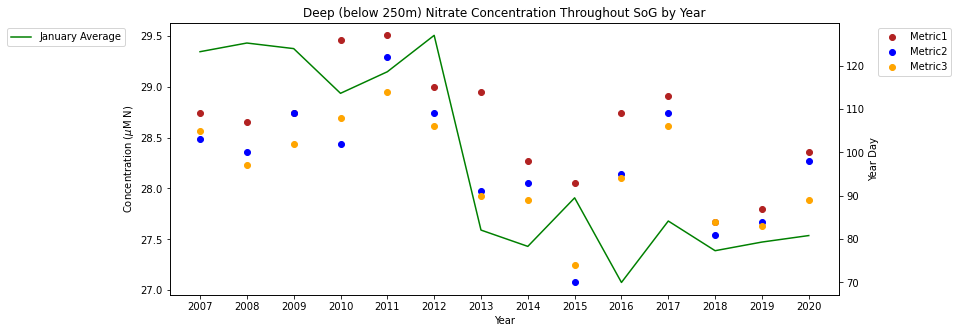

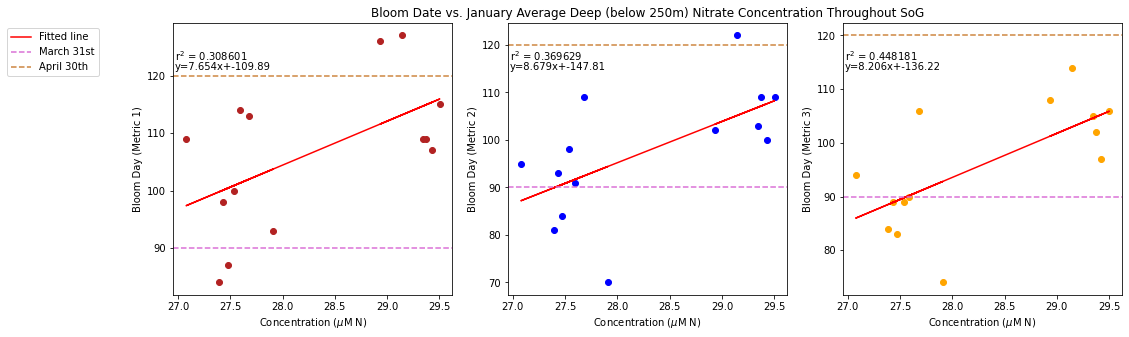

In [32]:
fig,ax=plt.subplots(1,1,figsize=(12,5))
p1=ax.plot(years,deepno3jan, '-',color='green',label='January Average')
#p2=ax.plot(years,deepno3feb, '-',color='c',label='February Average')
#p3=ax.plot(years,deepno3mar, '-',color='orchid',label='March Average')
ax.set_ylabel('Concentration ($\mu$M N)')
ax.set_xlabel('Year')
ax.set_title('Deep (below 250m) Nitrate Concentration Throughout SoG by Year')
ax.set_xticks([2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020])
ax.legend(bbox_to_anchor=(-0.25, 1.0), loc='upper left')

ax1=ax.twinx()
p4=ax1.plot(years,yearday1, 'o',color='firebrick',label='Metric1')
p5=ax1.plot(years,yearday2, 'o',color='b',label='Metric2')
p6=ax1.plot(years,yearday3, 'o',color='orange',label='Metric3')
ax1.set_ylabel('Year Day')
ax1.legend(handles=[p4[0],p5[0],p6[0]],bbox_to_anchor=(1.05, 1.0), loc='upper left')

fig2,ax2=plt.subplots(1,3,figsize=(17,5))
ax2[0].plot(deepno3jan,yearday1,'o',color='firebrick')
ax2[0].set_xlabel('Concentration ($\mu$M N)')
ax2[0].set_ylabel('Bloom Day (Metric 1)')
y,r2,m,b=bloomdrivers.reg_r2(deepno3jan,yearday1)
ax2[0].plot(deepno3jan, y, 'r', label='Fitted line')
ax2[0].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax.transAxes)
ax2[0].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax.transAxes)

ax2[1].plot(deepno3jan,yearday2,'o',color='b')
ax2[1].set_xlabel('Concentration ($\mu$M N)')
ax2[1].set_ylabel('Bloom Day (Metric 2)')
y,r2,m,b=bloomdrivers.reg_r2(deepno3jan,yearday2)
ax2[1].plot(deepno3jan, y, 'r', label='Fitted line')
ax2[1].text(0.6, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax.transAxes)
ax2[1].text(0.6,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax.transAxes)

ax2[2].plot(deepno3jan,yearday3,'o',color='orange')
ax2[2].set_xlabel('Concentration ($\mu$M N)')
ax2[2].set_ylabel('Bloom Day (Metric 3)')
y,r2,m,b=bloomdrivers.reg_r2(deepno3jan,yearday3)
ax2[2].plot(deepno3jan, y, 'r', label='Fitted line')
ax2[2].text(1.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax.transAxes)
ax2[2].text(1.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax.transAxes)
ax2[1].set_title('Bloom Date vs. January Average Deep (below 250m) Nitrate Concentration Throughout SoG')

# Jan month lines
ax2[0].axhline(y=90, color='orchid', linestyle='--',label='March 31st')
ax2[0].axhline(y=120, color='peru', linestyle='--',label='April 30th')
#ax2[0].axhline(y=151, color='lime', linestyle='--',label='May 31st')
ax2[0].legend(bbox_to_anchor=(-0.25, 1.0))
ax2[1].axhline(y=90, color='orchid', linestyle='--')
ax2[2].axhline(y=90, color='orchid', linestyle='--',label='March 31st')
ax2[1].axhline(y=120, color='peru', linestyle='--')
ax2[2].axhline(y=120, color='peru', linestyle='--',label='April 30th')

### Halocline

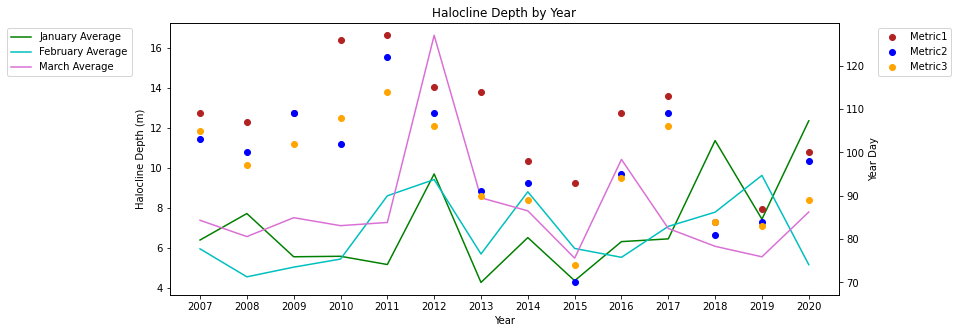

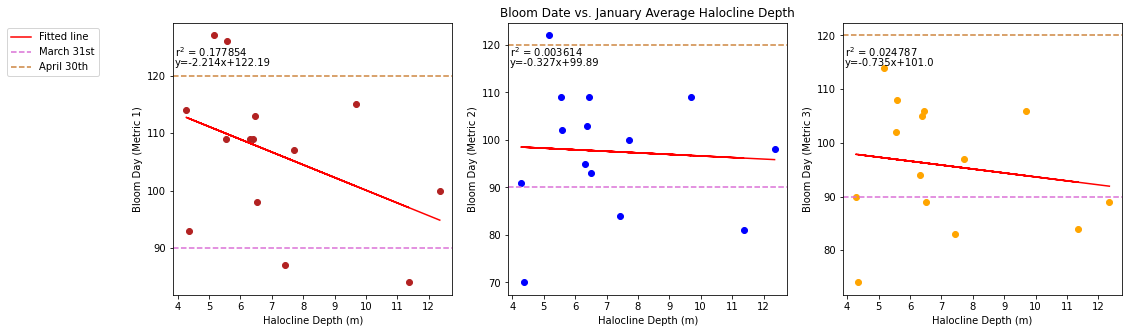

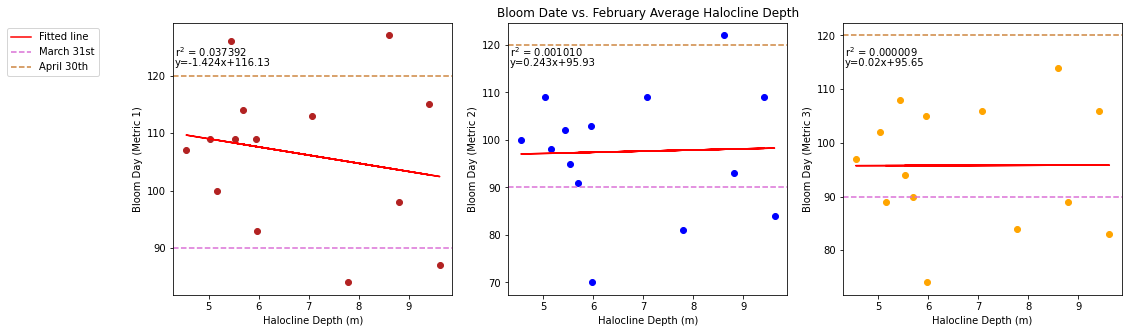

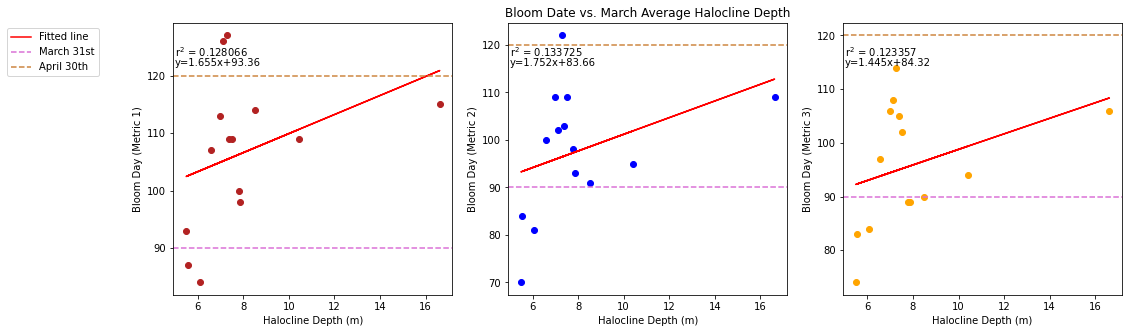

In [33]:
fig,ax=plt.subplots(1,1,figsize=(12,5))
p1=ax.plot(years,halojan, '-',color='green',label='January Average')
p2=ax.plot(years,halofeb, '-',color='c',label='February Average')
p3=ax.plot(years,halomar, '-',color='orchid',label='March Average')
ax.set_ylabel('Halocline Depth (m)')
ax.set_xlabel('Year')
ax.set_title('Halocline Depth by Year')
ax.set_xticks([2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020])
ax.legend(handles=[p1[0],p2[0],p3[0]],bbox_to_anchor=(-0.25, 1.0), loc='upper left')

ax1=ax.twinx()
p4=ax1.plot(years,yearday1, 'o',color='firebrick',label='Metric1')
p5=ax1.plot(years,yearday2, 'o',color='b',label='Metric2')
p6=ax1.plot(years,yearday3, 'o',color='orange',label='Metric3')
ax1.set_ylabel('Year Day')
ax1.legend(handles=[p4[0],p5[0],p6[0]],bbox_to_anchor=(1.05, 1.0), loc='upper left')

# JAN
fig2,ax2=plt.subplots(1,3,figsize=(17,5))
ax2[0].plot(halojan,yearday1,'o',color='firebrick')
ax2[0].set_xlabel('Halocline Depth (m)')
ax2[0].set_ylabel('Bloom Day (Metric 1)')
y,r2,m,b=bloomdrivers.reg_r2(halojan,yearday1)
ax2[0].plot(halojan, y, 'r', label='Fitted line')
ax2[0].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax.transAxes)
ax2[0].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax.transAxes)

ax2[1].plot(halojan,yearday2,'o',color='b')
ax2[1].set_xlabel('Halocline Depth (m)')
ax2[1].set_ylabel('Bloom Day (Metric 2)')
y,r2,m,b=bloomdrivers.reg_r2(halojan,yearday2)
ax2[1].plot(halojan, y, 'r', label='Fitted line')
ax2[1].text(0.6, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax.transAxes)
ax2[1].text(0.6,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax.transAxes)

ax2[2].plot(halojan,yearday3,'o',color='orange')
ax2[2].set_xlabel('Halocline Depth (m)')
ax2[2].set_ylabel('Bloom Day (Metric 3)')
ax2[1].set_title('Bloom Date vs. January Average Halocline Depth')
y,r2,m,b=bloomdrivers.reg_r2(halojan,yearday3)
ax2[2].plot(halojan, y, 'r', label='Fitted line')
ax2[2].text(1.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax.transAxes)
ax2[2].text(1.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax.transAxes)

# FEB
fig3,ax3=plt.subplots(1,3,figsize=(17,5))
ax3[0].plot(halofeb,yearday1,'o',color='firebrick')
ax3[0].set_xlabel('Halocline Depth (m)')
ax3[0].set_ylabel('Bloom Day (Metric 1)')
y,r2,m,b=bloomdrivers.reg_r2(halofeb,yearday1)
ax3[0].plot(halofeb, y, 'r', label='Fitted line')
ax3[0].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax.transAxes)
ax3[0].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax.transAxes)

ax3[1].plot(halofeb,yearday2,'o',color='b')
ax3[1].set_xlabel('Halocline Depth (m)')
ax3[1].set_ylabel('Bloom Day (Metric 2)')
y,r2,m,b=bloomdrivers.reg_r2(halofeb,yearday2)
ax3[1].plot(halofeb, y, 'r', label='Fitted line')
ax3[1].text(0.6, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax.transAxes)
ax3[1].text(0.6,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax.transAxes)

ax3[2].plot(halofeb,yearday3,'o',color='orange')
ax3[2].set_xlabel('Halocline Depth (m)')
ax3[2].set_ylabel('Bloom Day (Metric 3)')
ax3[1].set_title('Bloom Date vs. February Average Halocline Depth')
y,r2,m,b=bloomdrivers.reg_r2(halofeb,yearday3)
ax3[2].plot(halofeb, y, 'r', label='Fitted line')
ax3[2].text(1.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax.transAxes)
ax3[2].text(1.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax.transAxes)

# MAR
fig4,ax4=plt.subplots(1,3,figsize=(17,5))
ax4[0].plot(halomar,yearday1,'o',color='firebrick')
ax4[0].set_xlabel('Halocline Depth (m)')
ax4[0].set_ylabel('Bloom Day (Metric 1)')
y,r2,m,b=bloomdrivers.reg_r2(halomar,yearday1)
ax4[0].plot(halomar, y, 'r', label='Fitted line')
ax4[0].text(0.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax.transAxes)
ax4[0].text(0.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax.transAxes)

ax4[1].plot(halomar,yearday2,'o',color='b')
ax4[1].set_xlabel('Halocline Depth (m)')
ax4[1].set_ylabel('Bloom Day (Metric 2)')
y,r2,m,b=bloomdrivers.reg_r2(halomar,yearday2)
ax4[1].plot(halomar, y, 'r', label='Fitted line')
ax4[1].text(0.6, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax.transAxes)
ax4[1].text(0.6,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax.transAxes)

ax4[2].plot(halomar,yearday3,'o',color='orange')
ax4[2].set_xlabel('Halocline Depth (m)')
ax4[2].set_ylabel('Bloom Day (Metric 3)')
ax4[1].set_title('Bloom Date vs. March Average Halocline Depth')
y,r2,m,b=bloomdrivers.reg_r2(halomar,yearday3)
ax4[2].plot(halomar, y, 'r', label='Fitted line')
ax4[2].text(1.1, 0.85, '$\mathregular{r^2}$ = %f'%r2, transform=ax.transAxes)
ax4[2].text(1.1,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax.transAxes)


# Jan month lines
ax2[0].axhline(y=90, color='orchid', linestyle='--',label='March 31st')
ax2[0].axhline(y=120, color='peru', linestyle='--',label='April 30th')
#ax2[0].axhline(y=151, color='lime', linestyle='--',label='May 31st')
ax2[0].legend(bbox_to_anchor=(-0.25, 1.0))
ax2[1].axhline(y=90, color='orchid', linestyle='--')
ax2[2].axhline(y=90, color='orchid', linestyle='--',label='March 31st')
ax2[1].axhline(y=120, color='peru', linestyle='--')
ax2[2].axhline(y=120, color='peru', linestyle='--',label='April 30th')
# Feb month lines
ax3[0].axhline(y=90, color='orchid', linestyle='--',label='March 31st')
ax3[0].axhline(y=120, color='peru', linestyle='--',label='April 30th')
#ax3[0].axhline(y=151, color='lime', linestyle='--',label='May 31st')
ax3[0].legend(bbox_to_anchor=(-0.25, 1.0))
ax3[1].axhline(y=90, color='orchid', linestyle='--')
ax3[2].axhline(y=90, color='orchid', linestyle='--',label='March 31st')
ax3[1].axhline(y=120, color='peru', linestyle='--')
ax3[2].axhline(y=120, color='peru', linestyle='--',label='April 30th')
# March month lines
ax4[0].axhline(y=90, color='orchid', linestyle='--',label='March 31st')
ax4[0].axhline(y=120, color='peru', linestyle='--',label='April 30th')
#ax4[0].axhline(y=151, color='lime', linestyle='--',label='May 31st')
ax4[0].legend(bbox_to_anchor=(-0.25, 1.0))
ax4[1].axhline(y=90, color='orchid', linestyle='--')
ax4[2].axhline(y=90, color='orchid', linestyle='--',label='March 31st')
ax4[1].axhline(y=120, color='peru', linestyle='--')
ax4[2].axhline(y=120, color='peru', linestyle='--',label='April 30th')